## Importing Libraries

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Add project root to Python path
project_root = os.path.abspath("..")  # if main.ipynb is inside Notebooks/
sys.path.append(project_root)

print(project_root)

print("Working directory:", os.getcwd())
print("Folders:", os.listdir())

c:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear
Working directory: c:\Users\dwepp\OneDrive\Documents\4th Year\AISE 4010\Final Project\CNC-Tool-Wear\Notebooks
Folders: ['main.ipynb', 'transformer_hpo']


## Displaying Loaded data from 18 experiments and train

In [2]:

from src.data_processing import load_experiments
# displaying experiment 1, 11, and 18 to ensure data loaded in properly
experiments, dftrain = load_experiments()

display(experiments[0].head(6))
display(experiments[10].head(6))
display(experiments[17].head(6))
display(dftrain.head(6))

# display column names for experiment 1 and train.csv
print("\n\nColumn names for experiments:")
print(experiments[0].columns.tolist())
print("\n\nColumn names for train.csv:")
print(dftrain.columns.tolist())

# display info from experiment 1
print("\n\nExperiment 1 info():")
display(experiments[0].info())

# display describe from experiment 1
print("\n\nExperiment 1 describe():")
display(experiments[0].describe())




X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   
5              191.0              -17.6                  81.20   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   
5               191.0               -17.9                0.000191   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           0.1860             328.0             23.30   
2               -8.59           0.1400             328.0             30.60   
3               -6.11           0.1300             327.0             30.30   
4               -5.70           0.1140             328.0             30.50   
5               -5.85           0.1280             328.0             30.90   

   ...  S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
0  ...               0.524     2.740000e-19             329.0   
1  ...              -0.288     2.740000e-19             328.0   
2  ...               0.524     2.740000e-19             328.0   
3  ...              -0.180     2.740000e-19             328.0   
4  ...               0.226     2.740000e-19             328.0   
5  ...               0.821     2.740000e-19             328.0   

   S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0               0.0    6.960000e-07              12.0   
1               0.0   -5.270000e-07              12.0   
2               0.0    9.100000e-07              12.0   
3               0.0    1.070000e-06              12.0   
4               0.0    1.960000e-06              12.0   
5               0.0    0.000000e+00              12.0   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 0.0                 50.0   
1                        1.0                 4.0                 50.0   
2                        1.0                 7.0                 50.0   
3                        1.0                 7.0                 50.0   
4                        1.0                 7.0                 50.0   
5                        1.0                 7.0                 50.0   

   Machining_Process  
0           Starting  
1               Prep  
2               Prep  
3               Prep  
4               Prep  
5               Prep  

[6 rows x 48 columns]

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              162.0              -1.15                   87.5   
1              162.0              -1.35                   87.5   
2              162.0              -1.75                   87.5   
3              161.0              -2.13                   56.3   
4              161.0              -2.20                   68.7   
5              161.0              -2.45                   18.8   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               162.0               -1.34                   -3.08   
1               162.0               -1.64                   -2.88   
2               162.0               -1.92                   -2.65   
3               161.0               -2.17                   -2.38   
4               161.0               -2.39                   -2.08   
5               161.0               -2.58                   -1.76   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0               -5.16           0.0750             327.0              6.02   
1               -5.78           0.0898             327.0              7.15   
2               -4.28           0.0684             327.0              6.68   
3               -4.47           0.0783             327.0              7.79   
4               -2.86           0.0762             327.0             10.30   
5               -5.08           0.0914             327.0             10.10   

   ...  S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
0  ...                13.7            0.806             319.0   
1  ...                22.5            1.010             318.0   
2  ...                20.7            0.946             319.0   
3  ...                16.9            0.758             320.0   
4  ...                20.8            1.040             319.0   
5  ...                17.2            0.859             318.0   

   S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0             118.0           0.153              12.0   
1             121.0           0.194              12.0   
2             115.0           0.182              12.0   
3             120.0           0.145              12.0   
4             121.0           0.201              12.0   
5             116.0           0.162              12.0   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 2.0                  3.0   
1                        1.0                86.0                  3.0   
2                        1.0                86.0                  3.0   
3                        1.0                86.0                  3.0   
4                        1.0                86.0                  3.0   
5                        1.0                86.0                  3.0   

   Machining_Process  
0               Prep  
1               Prep  
2               Prep  
3               Prep  
4               Prep  
5               Prep  

[6 rows x 48 columns]

X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              151.0               3.08                    0.0   
1              152.0               3.20                   25.0   
2              152.0               3.20                   50.0   
3              152.0               3.13                   50.0   
4              153.0               2.97                   56.3   
5              153.0               3.00                   56.3   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               151.0                 3.0                     0.0   
1               152.0                 3.0                     0.0   
2               152.0                 3.0                     0.0   
3               152.0                 3.0                     0.0   
4               153.0                 3.0                     0.0   
5               153.0                 3.0                     0.0   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                3.48           0.0684             327.0              8.56   
1                3.09           0.0621             327.0              6.74   
2                3.96           0.0796             327.0              8.78   
3                4.70           0.0946             327.0             10.20   
4                5.97           0.1020             327.0             11.30   
5                5.18           0.0923             327.0              9.55   

   ...  S1_CurrentFeedback  S1_DCBusVoltage  S1_OutputCurrent  \
0  ...                22.1            0.867             323.0   
1  ...                23.7            0.937             324.0   
2  ...                14.9            0.799             323.0   
3  ...                18.2            0.895             323.0   
4  ...                18.4            0.854             324.0   
5  ...                21.0            0.961             323.0   

   S1_OutputVoltage  S1_OutputPower  S1_SystemInertia  \
0             119.0           0.167              12.0   
1             119.0           0.179              12.0   
2             119.0           0.152              12.0   
3             114.0           0.172              12.0   
4             120.0           0.162              12.0   
5             120.0           0.184              12.0   

   M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  M1_CURRENT_FEEDRATE  \
0                        1.0                 2.0                  3.0   
1                        1.0                20.0                  3.0   
2                        1.0                20.0                  3.0   
3                        1.0                20.0                  3.0   
4                        1.0                20.0                  3.0   
5                        1.0                20.0                  3.0   

   Machining_Process  
0               Prep  
1               Prep  
2               Prep  
3               Prep  
4               Prep  
5               Prep  

[6 rows x 48 columns]

No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0   1      wax         6             4.0         unworn                 yes   
1   2      wax        20             4.0         unworn                 yes   
2   3      wax         6             3.0         unworn                 yes   
3   4      wax         6             2.5         unworn                  no   
4   5      wax        20             3.0         unworn                  no   
5   6      wax         6             4.0           worn                 yes   

  passed_visual_inspection  
0                      yes  
1                      yes  
2                      yes  
3                      NaN  
4                      NaN  
5                       no



Column names for experiments:
['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration', 'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration', 'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent', 'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition', 'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition', 'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback', 'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage', 'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity', 'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity', 'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage', 'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition', 'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition', 'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback', 'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage', 'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_N

None



Experiment 1 describe():


X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
count        1055.000000        1055.000000            1055.000000   
mean          151.998104          -0.514919               4.252891   
std             8.315984           5.875864             103.299534   
min           141.000000         -18.100000           -1090.000000   
25%           145.000000          -5.690000             -37.500000   
50%           151.000000          -0.050000               0.000000   
75%           159.000000           4.140000              37.500000   
max           198.000000          44.900000            1030.000000   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
count         1055.000000         1055.000000             1055.000000   
mean           151.999052           -0.516069                0.075188   
std              8.309193            5.871274               81.316778   
min            141.000000          -17.900000             -922.000000   
25%            145.000000           -5.770000                0.000000   
50%            151.000000            0.000000                0.000000   
75%            159.000000            4.280000                0.000000   
max            198.000000           44.700000              937.000000   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  \
count         1055.000000      1055.000000       1055.000000   
mean            -0.382762         0.081607        325.875829   
std              4.936649         0.030217          0.576857   
min            -17.000000         0.016300        322.000000   
25%             -4.940000         0.061900        326.000000   
50%             -1.100000         0.085800        326.000000   
75%              4.405000         0.099350        326.000000   
max             19.000000         0.319000        329.000000   

       X1_OutputVoltage  ...  S1_CommandAcceleration  S1_CurrentFeedback  \
count       1055.000000  ...            1.055000e+03         1055.000000   
mean          10.755812  ...            4.739336e-01           20.508831   
std            6.354004  ...            6.871208e+00            5.509617   
min            0.130000  ...           -9.540000e-07           -0.694000   
25%            5.885000  ...            0.000000e+00           18.300000   
50%           12.400000  ...            0.000000e+00           21.000000   
75%           14.000000  ...            0.000000e+00           23.350000   
max           64.800000  ...            1.000000e+02           62.000000   

       S1_DCBusVoltage  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  \
count     1.055000e+03        1055.00000       1055.000000     1055.000000   
mean      9.017116e-01         320.18673        114.488227        0.171890   
std       2.162504e-01           2.65724         20.408309        0.037033   
min       2.740000e-19         306.00000          0.000000       -0.000001   
25%       8.375000e-01         318.00000        117.000000        0.159000   
50%       9.280000e-01         321.00000        118.000000        0.178000   
75%       9.950000e-01         322.00000        119.000000        0.191500   
max       2.650000e+00         329.00000        129.000000        0.441000   

       S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  \
count            1055.0                     1055.0         1055.000000   
mean               12.0                        1.0           64.144076   
std                 0.0                        0.0           39.669174   
min                12.0                        1.0            0.000000   
25%                12.0                        1.0           29.000000   
50%                12.0                        1.0           65.000000   
75%                12.0                        1.0          100.000000   
max                12.0                        1.0          132.000000   

       M1_CURRENT_FEEDRATE  
count          1055.000000  
mean              8.669194  

## Displaying Worn or Unworn Values for Raw Data

Displaying unworn or worn values for the raw data will help us get a visualization, showing what experiments are taken with a worn vs unworn cutting tool.  

Text(0.5, 1.0, 'Worn vs Unworn Experiments')

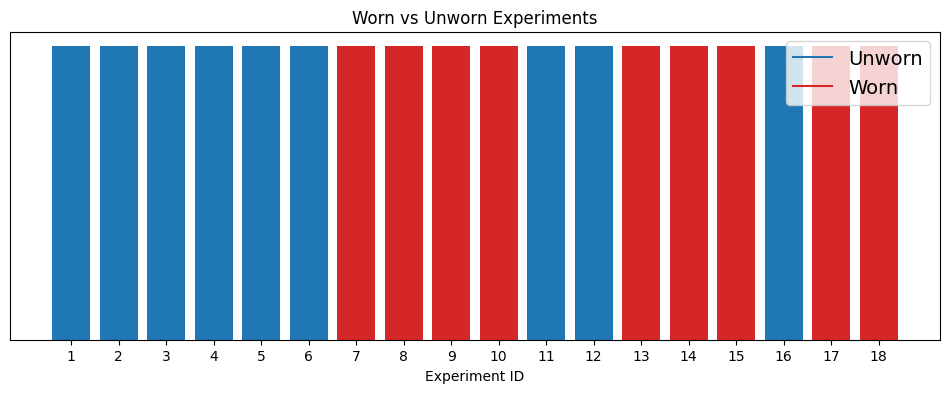

In [3]:
experiment_ids = list(range(1, 19))

# Replace these with your true labels
conditions = [
    "unworn", "unworn", "unworn", "unworn", "unworn", "unworn",
    "worn", "worn", "worn", "worn", "unworn", "unworn",
    "worn", "worn", "worn", 
    "unworn", "worn", "worn"
]

# Convert to colors
colors = ["tab:blue" if c == "unworn" else "tab:red" for c in conditions]

plt.figure(figsize=(12,4))
plt.bar(experiment_ids, [1]*18, color=colors)
plt.plot([], [], color="tab:blue", label="Unworn")
plt.plot([], [], color="tab:red", label="Worn")
plt.legend(fontsize=14, markerscale=2)

plt.xticks(experiment_ids)
plt.yticks([])  # hide y-axis
plt.xlabel("Experiment ID")
plt.title("Worn vs Unworn Experiments")

## Displaying Succesful Part Yes or No

A successful part is one where the machining process was fully completed and the part passed the visual inspection.  If either the machining wasn’t finished or the part didn’t pass inspection, it is marked as not successful.

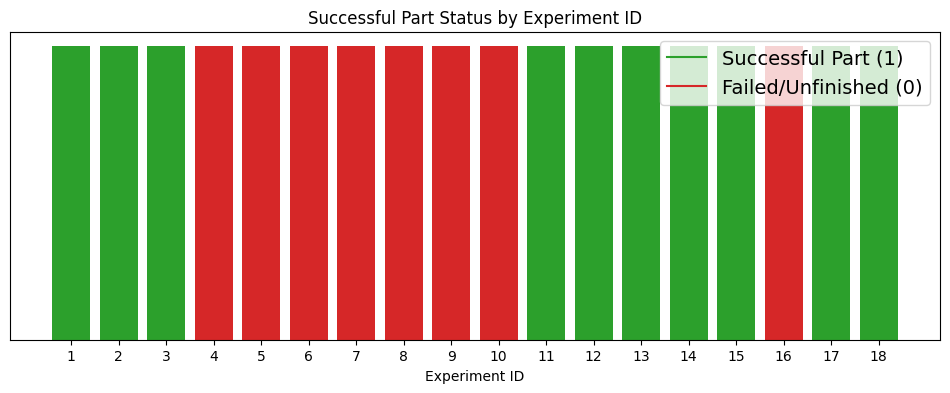

In [4]:
import matplotlib.pyplot as plt


experiment_ids = list(range(1, 19))


machining_finalized = [
    "yes","yes","yes","no","no","yes",
    "no","yes","yes","yes","yes","yes",
    "yes","yes","yes","no","yes","yes"
]

passed_visual_inspection = [
    "yes","yes","yes","", "", "no",
    "", "no", "no", "no", "yes", "yes",
    "yes", "yes", "yes", "", "yes", "yes"
]


successful_part = []
for finished, passed in zip(machining_finalized, passed_visual_inspection):
    if finished.lower() == "yes" and passed.lower() == "yes":
        successful_part.append(1)
    else:
        successful_part.append(0)


colors = ["tab:green" if s == 1 else "tab:red" for s in successful_part]

plt.figure(figsize=(12,4))
plt.bar(experiment_ids, [1]*18, color=colors)


plt.plot([], [], color="tab:green", label="Successful Part (1)")
plt.plot([], [], color="tab:red", label="Failed/Unfinished (0)")
plt.legend(fontsize=14, markerscale=2)

plt.xticks(experiment_ids)
plt.yticks([])
plt.xlabel("Experiment ID")
plt.title("Successful Part Status by Experiment ID")
plt.show()


## Scatter Plot of Feedrate vs Clamp Pressure for Tool Condition unworn/worn

This plot shows how feedrate and clamp pressure change depending on whether the tool is worn or unworn. It helps you see where each type of tool normally operates and how their settings differ.

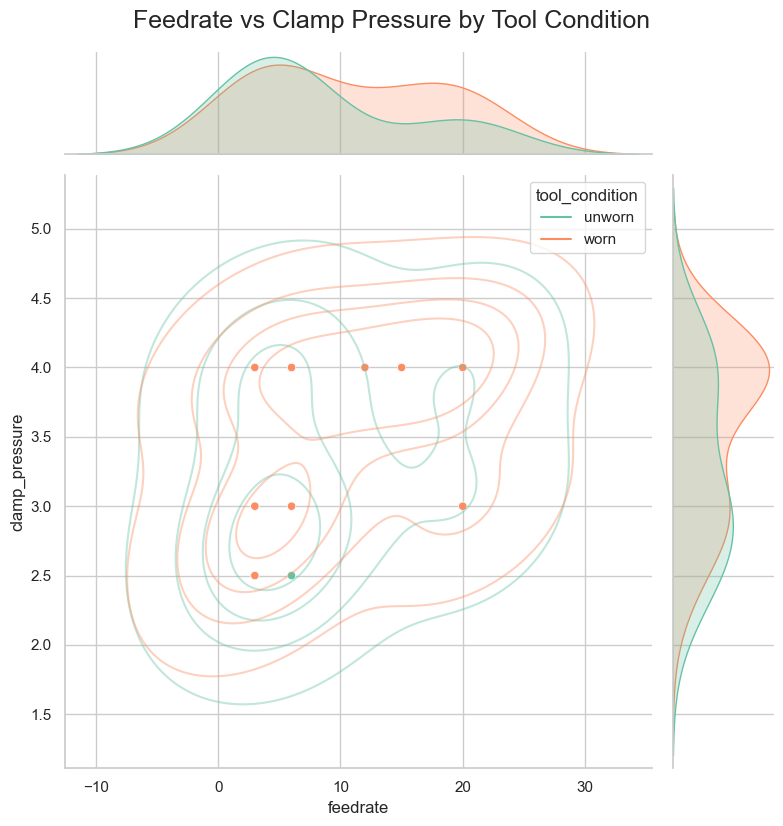

In [5]:
from src.utils import plot_feedrate_clamp_joint

plot_feedrate_clamp_joint(dftrain, title = "Feedrate vs Clamp Pressure by Tool Condition")


## Scatter Plot of Feedrate vs Clamp Pressure for Successful Part Yes/No

This plot shows how feedrate and clamp pressure change depending on whether the tool is succesful or not. It helps you see how settings differ for a successful vs non successful part.

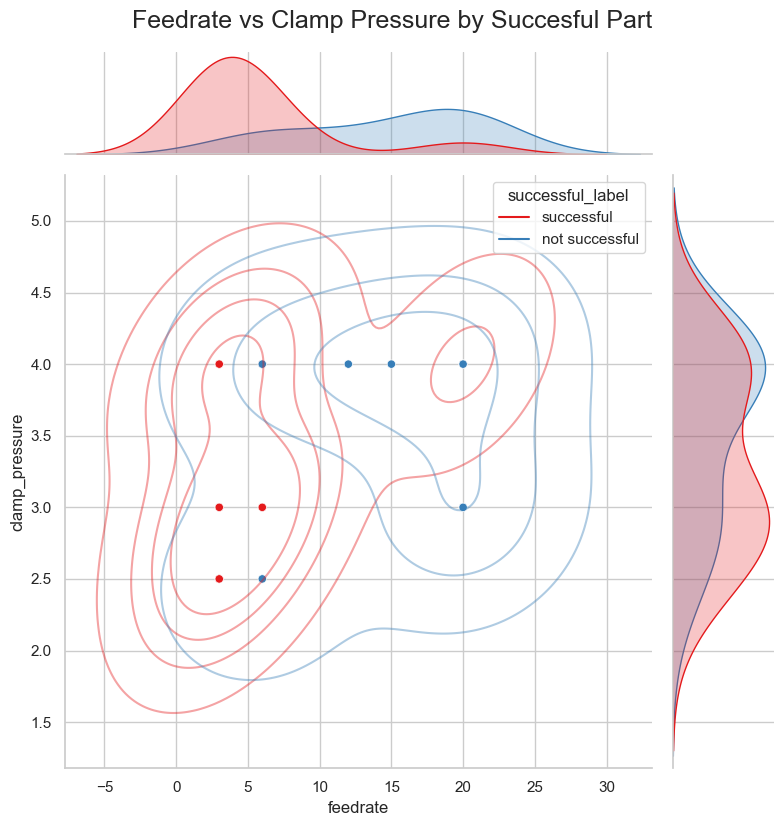

In [6]:
from src.utils import plot_feedrate_clamp_joint_successful
dftrain["successful_part"] = 0


for i, row in dftrain.iterrows():
    finished = str(row["machining_finalized"]).lower()
    passed   = str(row["passed_visual_inspection"]).lower()

    if finished == "yes" and passed == "yes":
        dftrain.at[i, "successful_part"] = 1
    else:
        dftrain.at[i, "successful_part"] = 0


plot_feedrate_clamp_joint_successful(dftrain, title="Feedrate vs Clamp Pressure by Succesful Part")

In [7]:
project_root = Path(r"C:\Users\aaron\OneDrive\Documents\Year 4\AISE 4010A\Project\CNC-Tool-Wear")
src_path = project_root / "src"

sys.path.insert(0, str(src_path))
from src.utils import plot_time_all_experiments

## Raw Data Visualization for Raw Data
In the raw data visualization, since there are 48 columns and 18 experiments there would be way too many plots for each feature.  For this reason we will only be plotting the features that respond most to tool wear and having a successful part. 

Raw Features that will be plotted:

Velocity:
Shows how fast each axis or the spindle is moving, revealing cutting regions, transitions, and motion patterns.

- X1_ActualVelocity
- Y1_ActualVelocity
- Z1_ActualVelocity
- S1_ActualVelocity

Output Power:
Indicates the mechanical load on the motors, which increases when the tool is worn or cutting heavily.

- X1_OutputPower
- Y1_OutputPower
- S1_OutputPower

Current Feedback:
Measures actual motor torque, directly reflecting cutting force and tool engagement.

- X1_FeedbackCurrent
- Y1_FeedbackCurrent
- Z1_FeedbackCurrent
- S1_FeedbackCurrent

Acceleration:
Highlights rapid motion changes or vibration, which can increase with tool wear.

- X1_ActualAcceleration
- Z1_ActualAcceleration

Position:
Provides context for where the tool is in the toolpath during different cutting events.

- S1_ActualPosition
- X1_ActualPosition
- Y1_ActualPosition

Machining Controller Channel:

- M1_CURRENT_FEEDRATE: Shows the feedrate being applied, which affects cutting force and load.
- M1_sequence_number: Identifies which G-code instruction is running at each moment.
- M1_CURRENT_PROGRAM_NUMBER: Indicates the machining program in use, helping match data to machining stages.




## Plotting Average Velocity vs Time

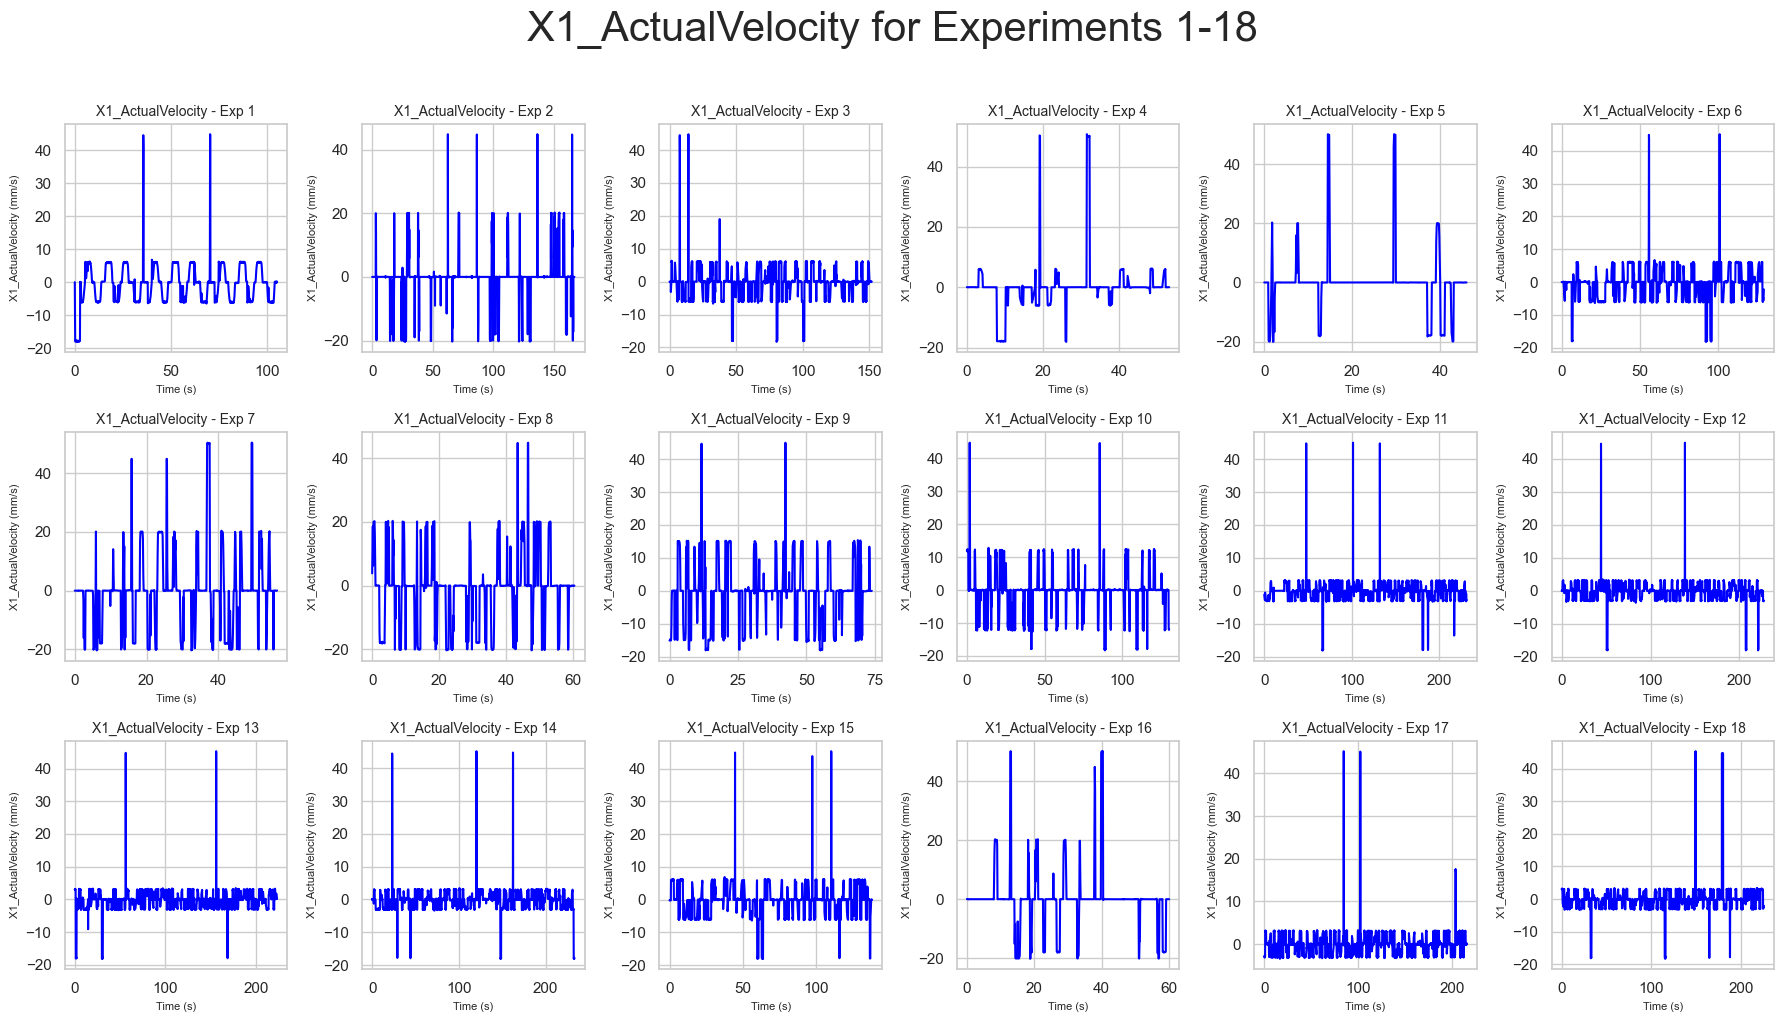

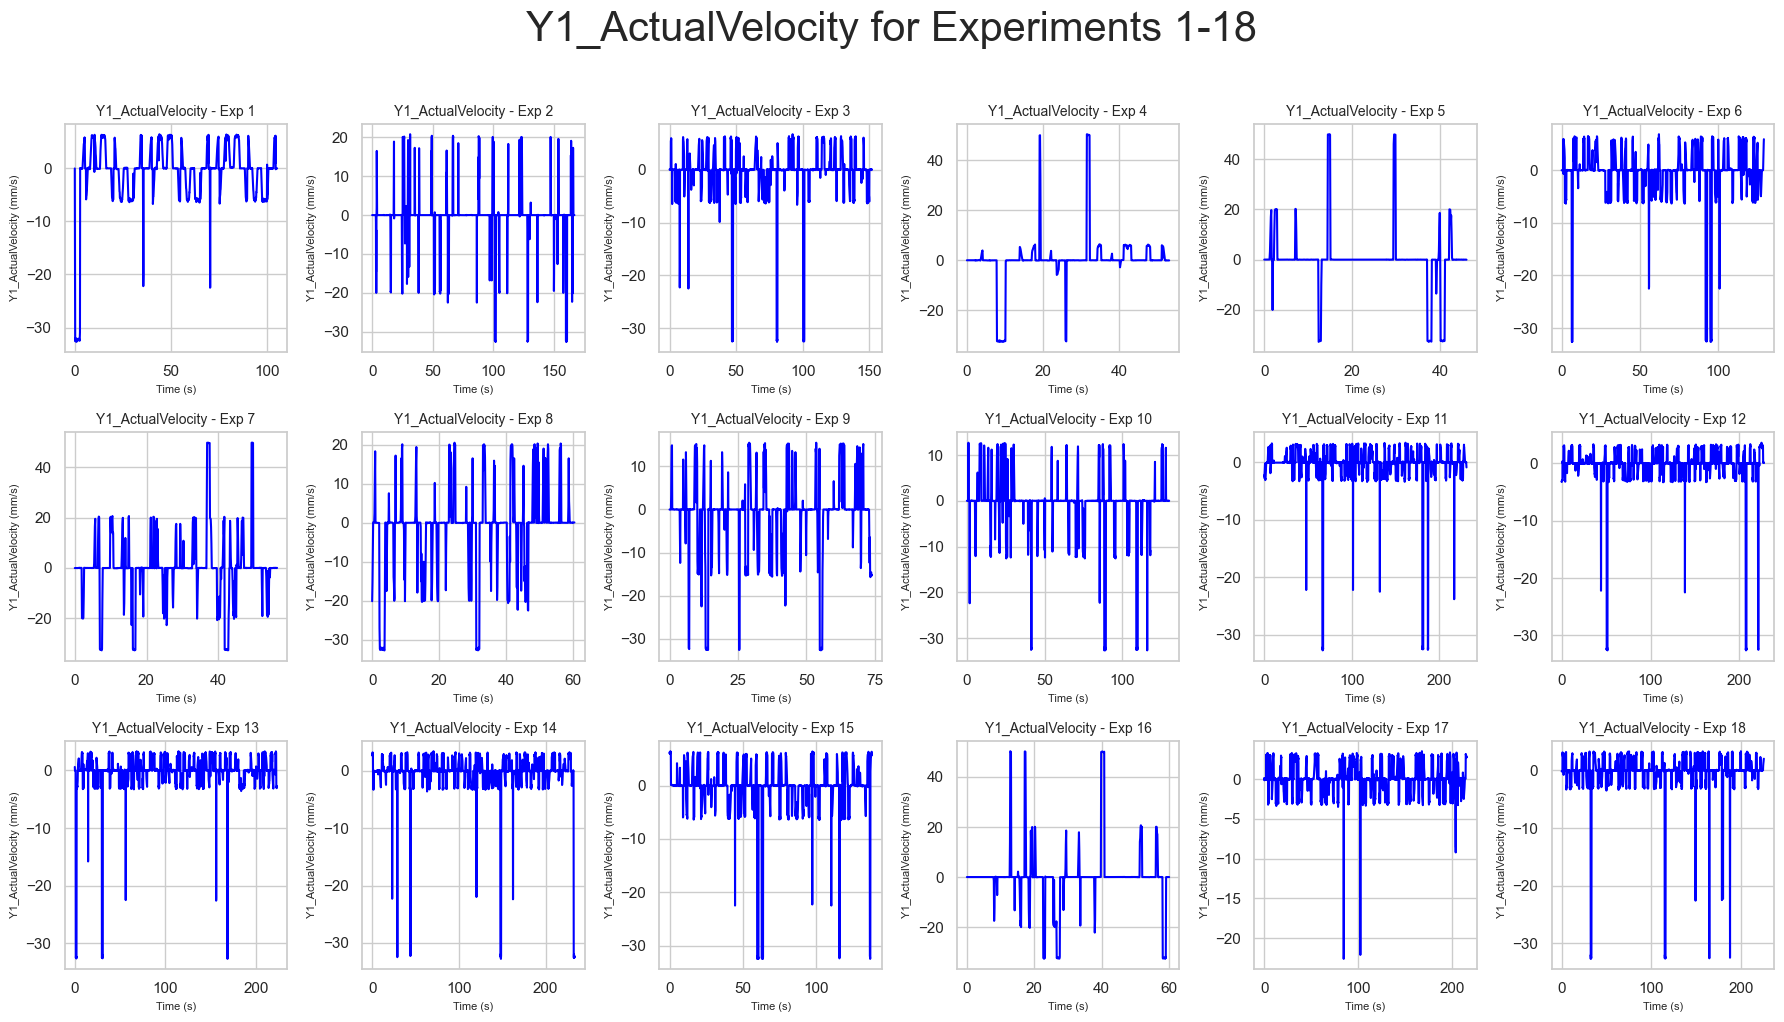

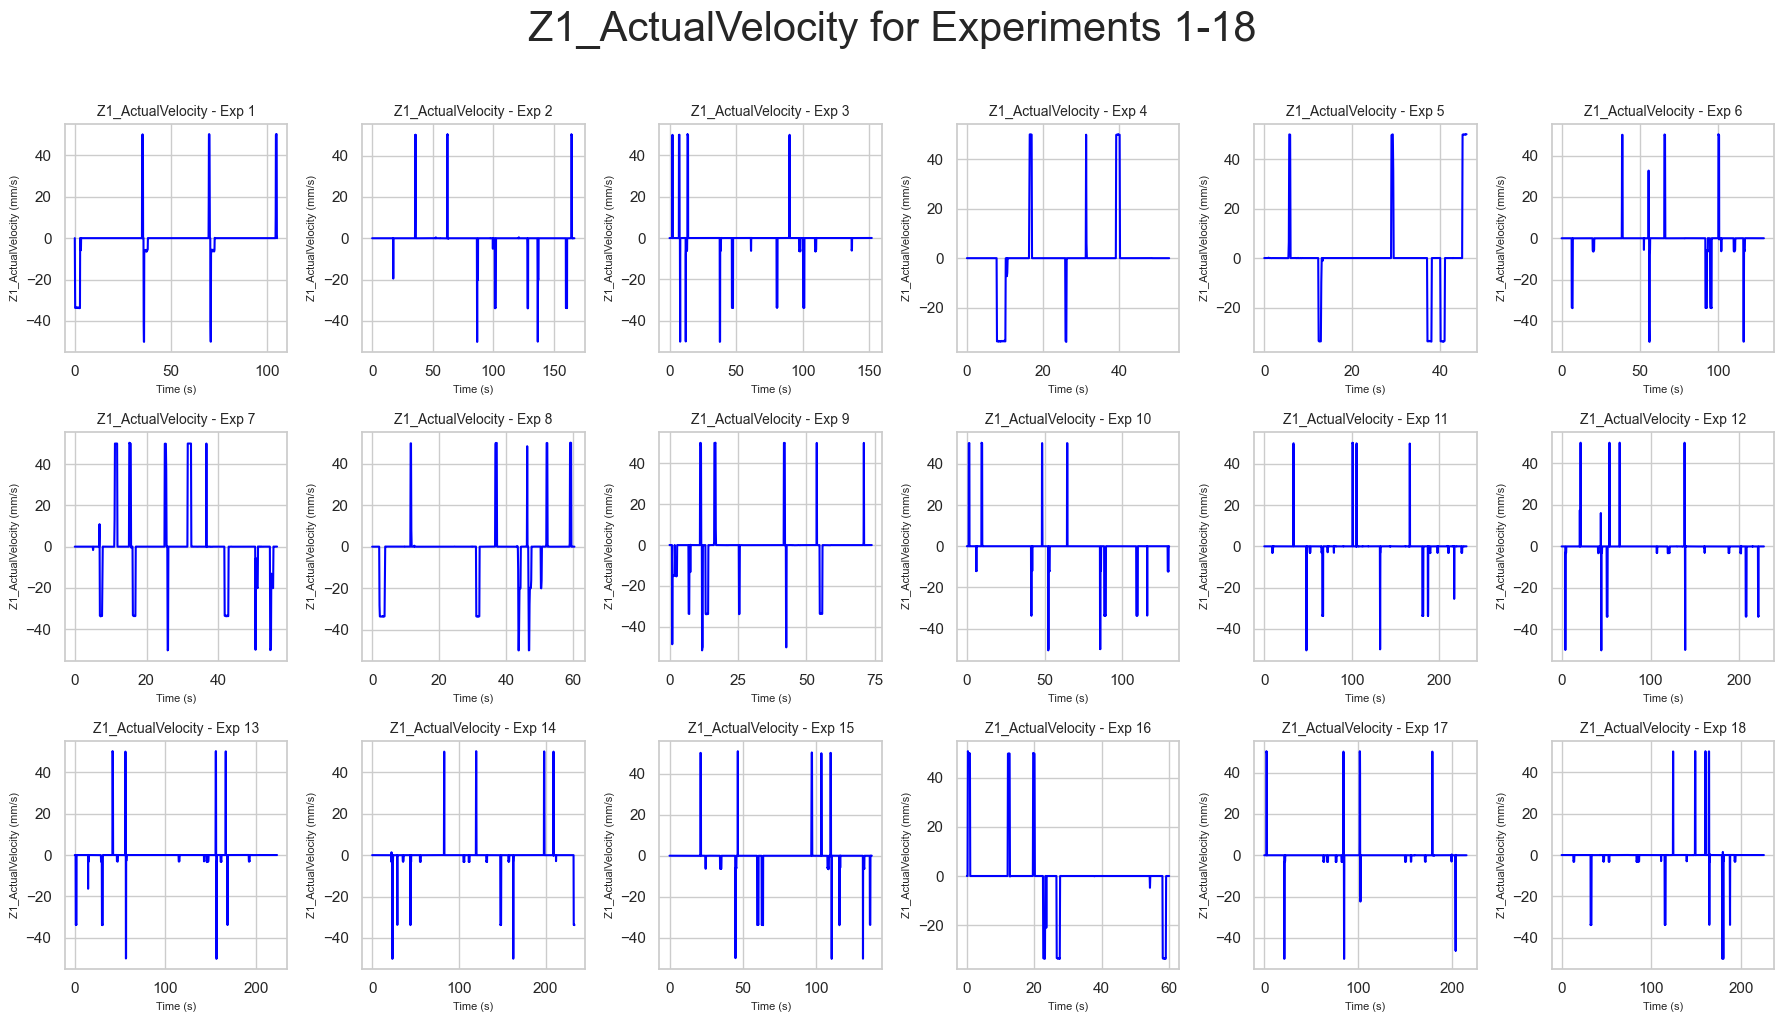

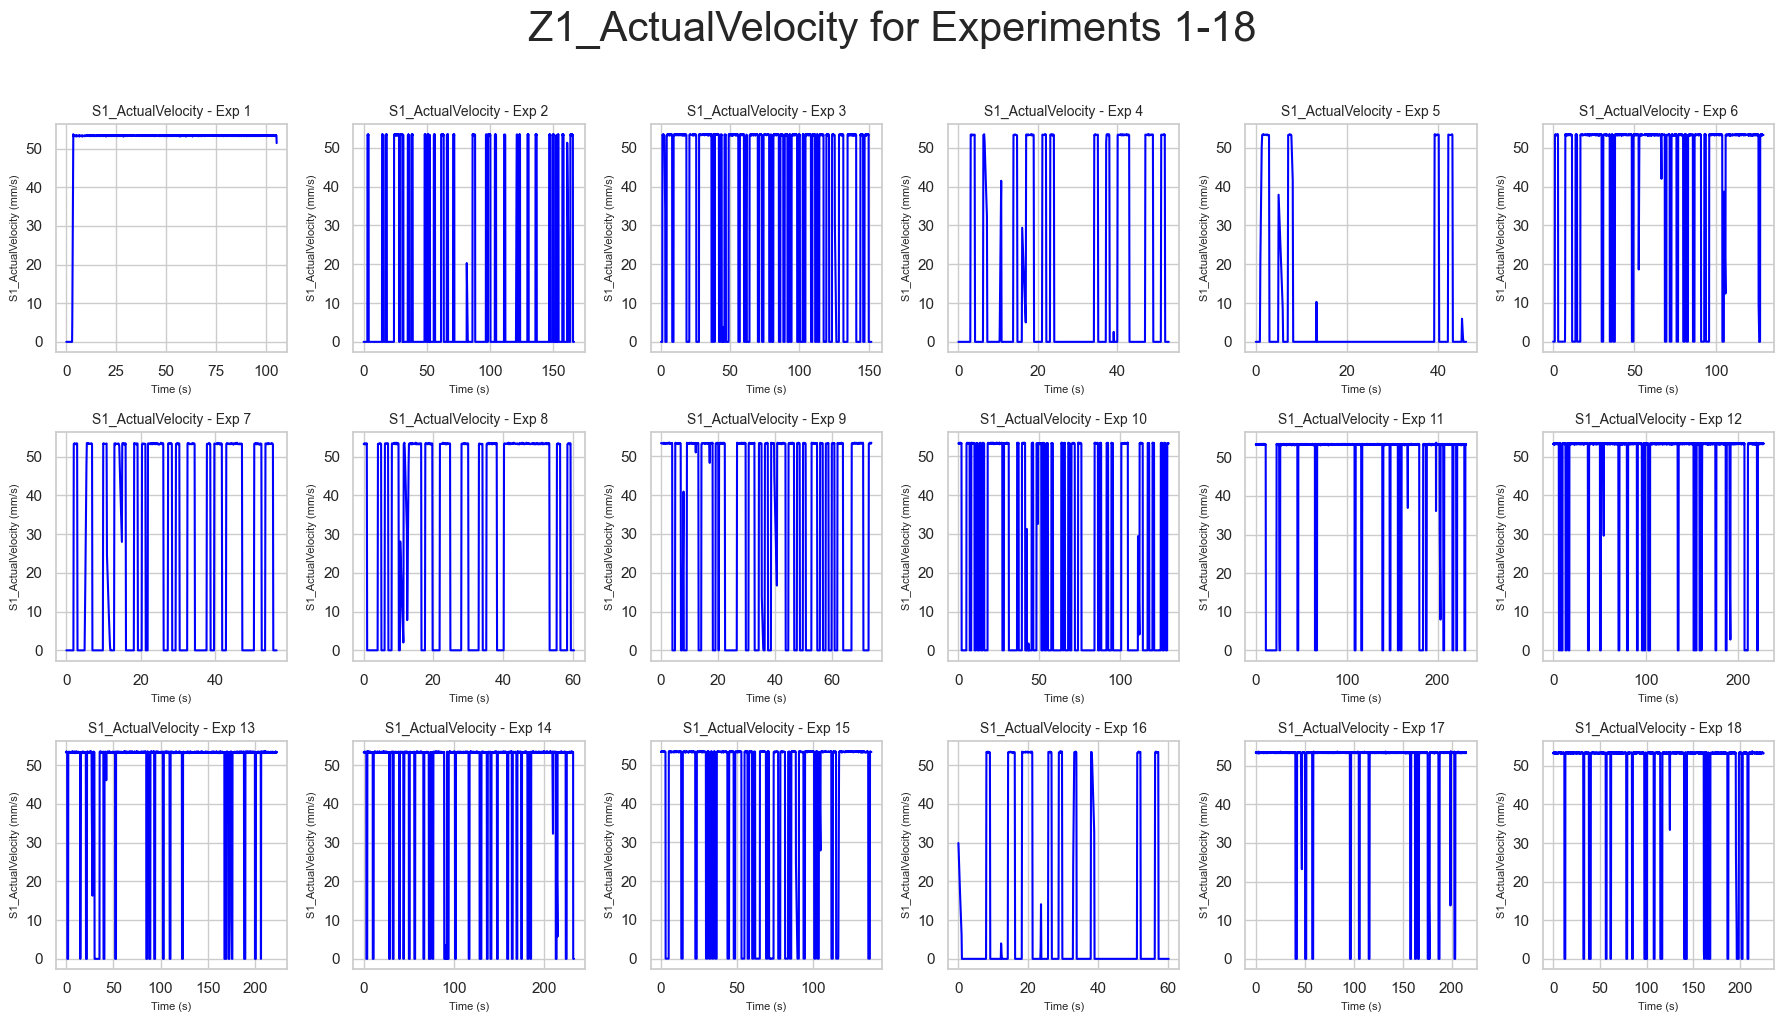

In [8]:
plot_time_all_experiments(experiments, "X1_ActualVelocity", "X1_ActualVelocity (mm/s)", "blue", "X1_ActualVelocity for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_ActualVelocity", "Y1_ActualVelocity (mm/s)", "blue","Y1_ActualVelocity for Experiments 1-18")
plot_time_all_experiments(experiments, "Z1_ActualVelocity", "Z1_ActualVelocity (mm/s)", "blue", "Z1_ActualVelocity for Experiments 1-18")
plot_time_all_experiments(experiments, "S1_ActualVelocity", "S1_ActualVelocity (mm/s)", "blue","Z1_ActualVelocity for Experiments 1-18")
 


## Plotting Output Power vs Time

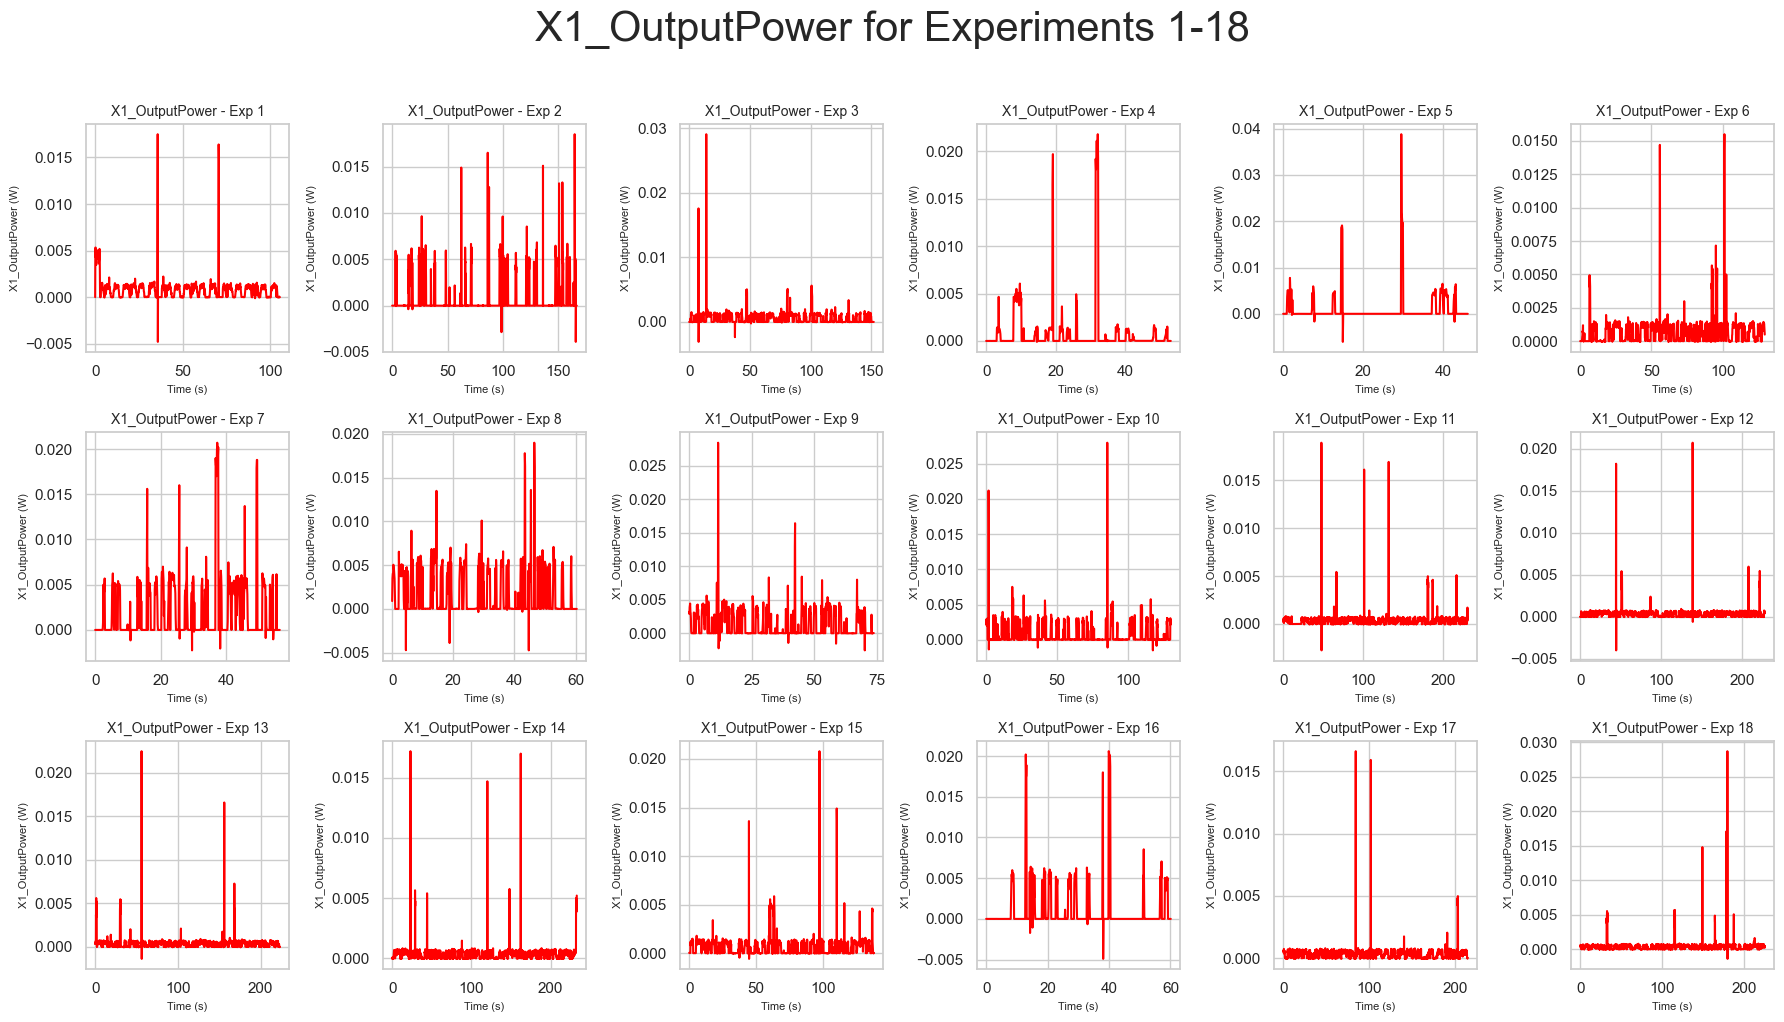

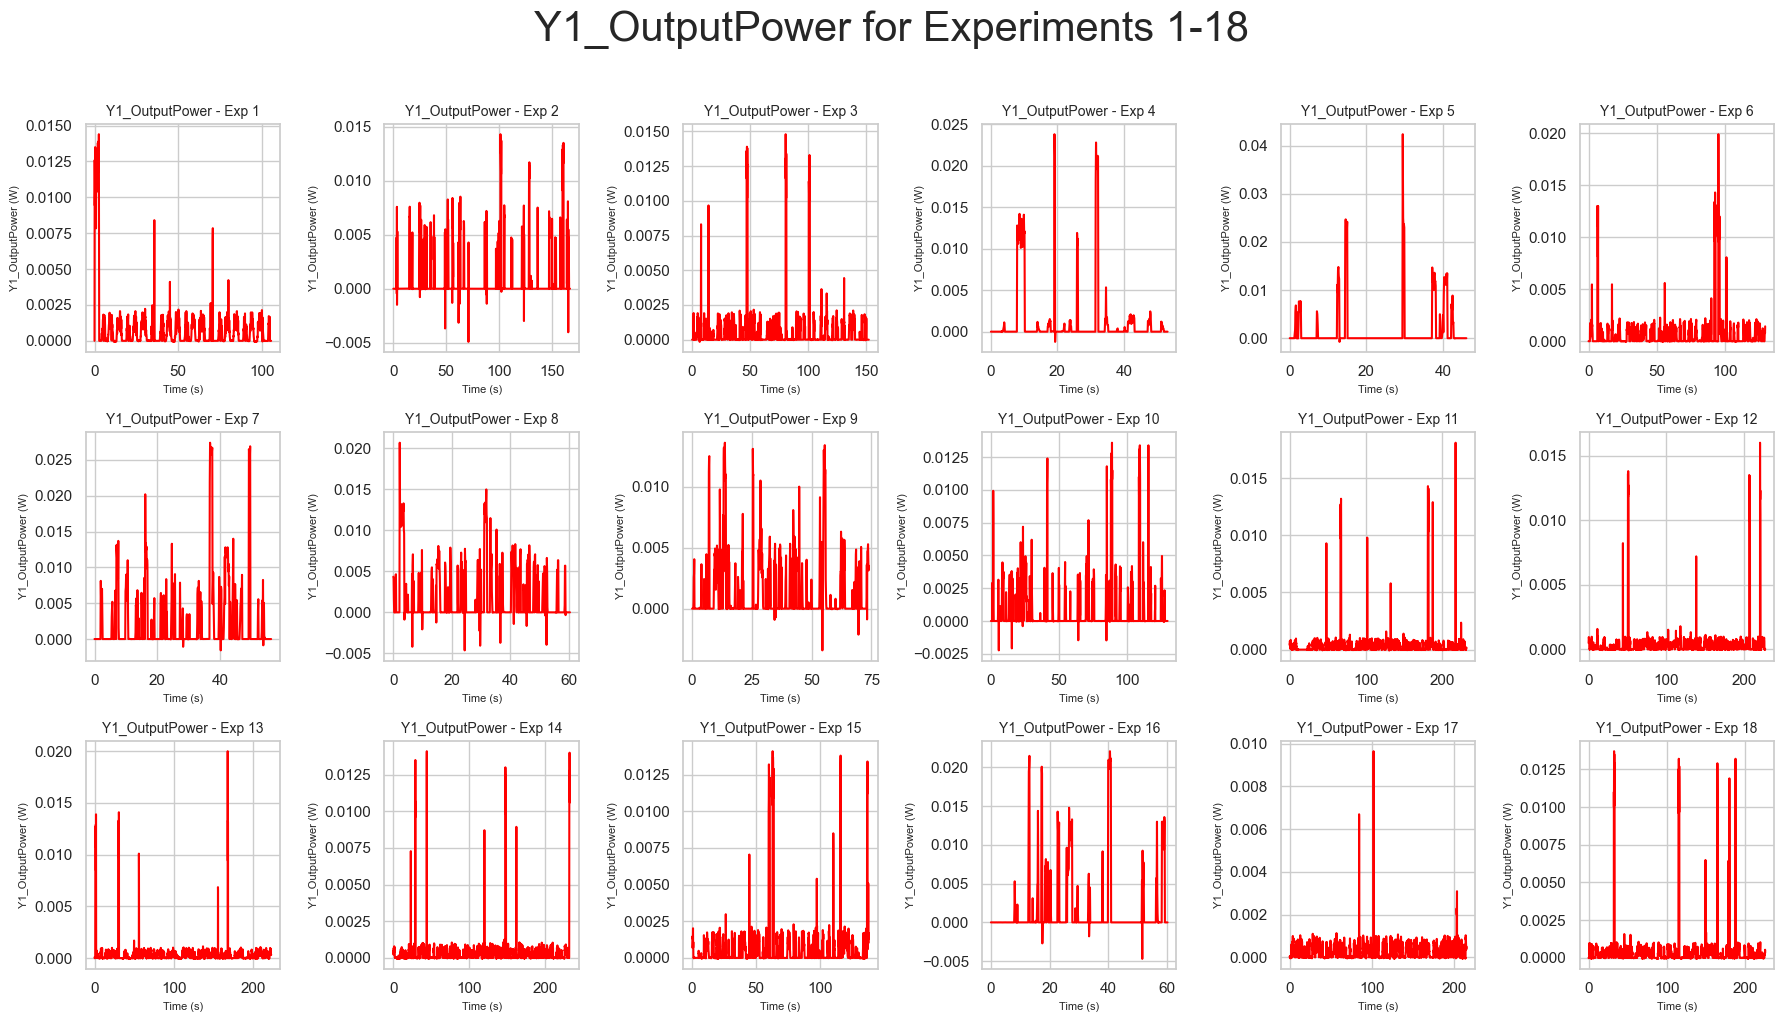

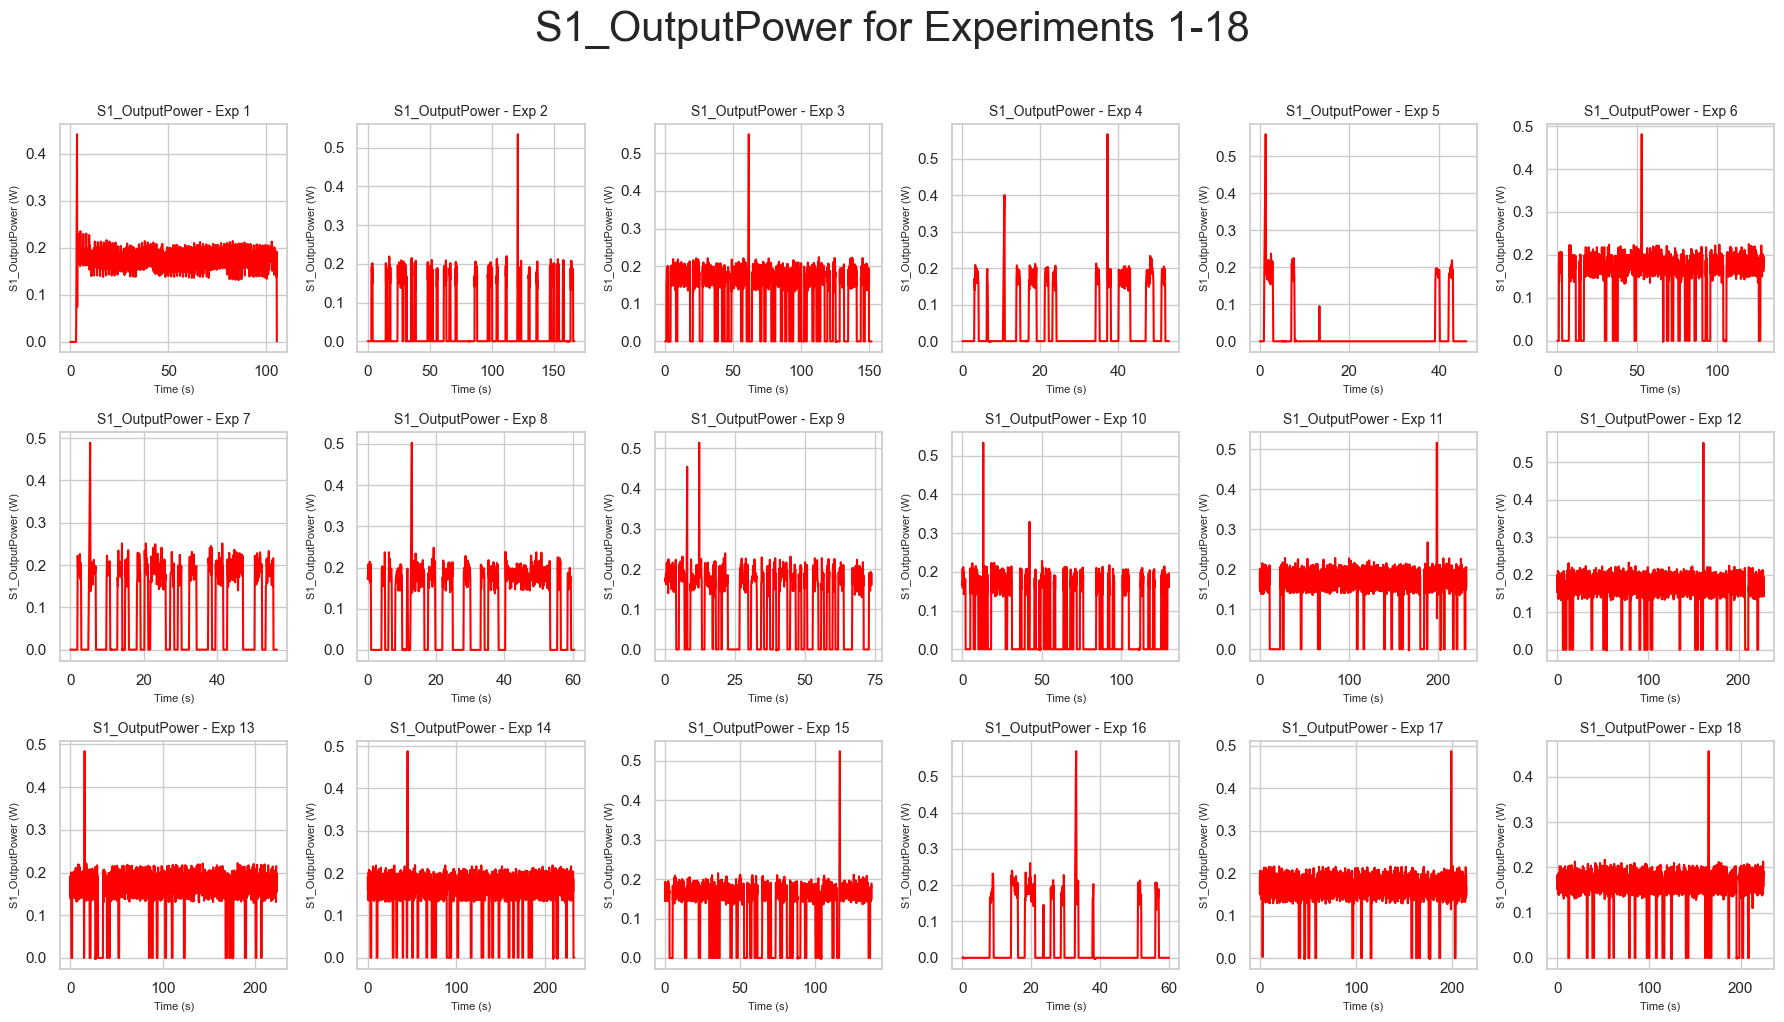

In [9]:
plot_time_all_experiments(experiments, "X1_OutputPower", "X1_OutputPower (W)", "red", "X1_OutputPower for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_OutputPower", "Y1_OutputPower (W)", "red", "Y1_OutputPower for Experiments 1-18")
plot_time_all_experiments(experiments, "S1_OutputPower", "S1_OutputPower (W)", "red", "S1_OutputPower for Experiments 1-18")



## Plotting Current Feedback vs Time

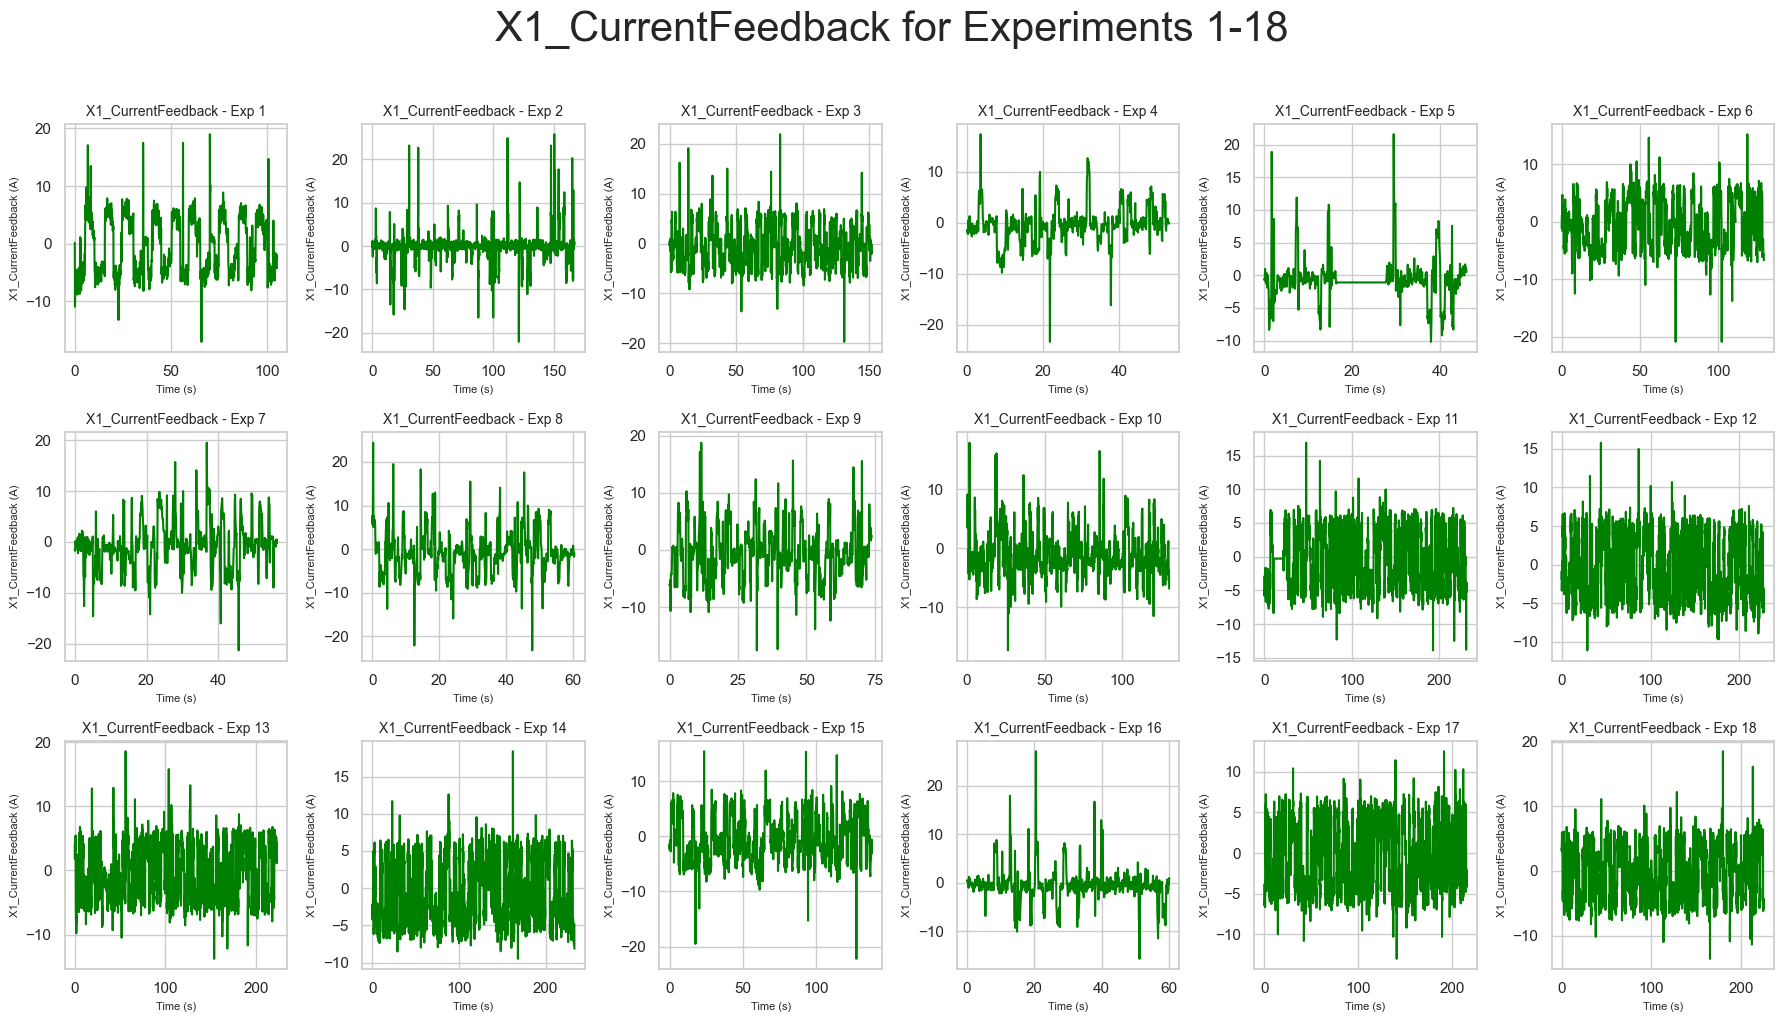

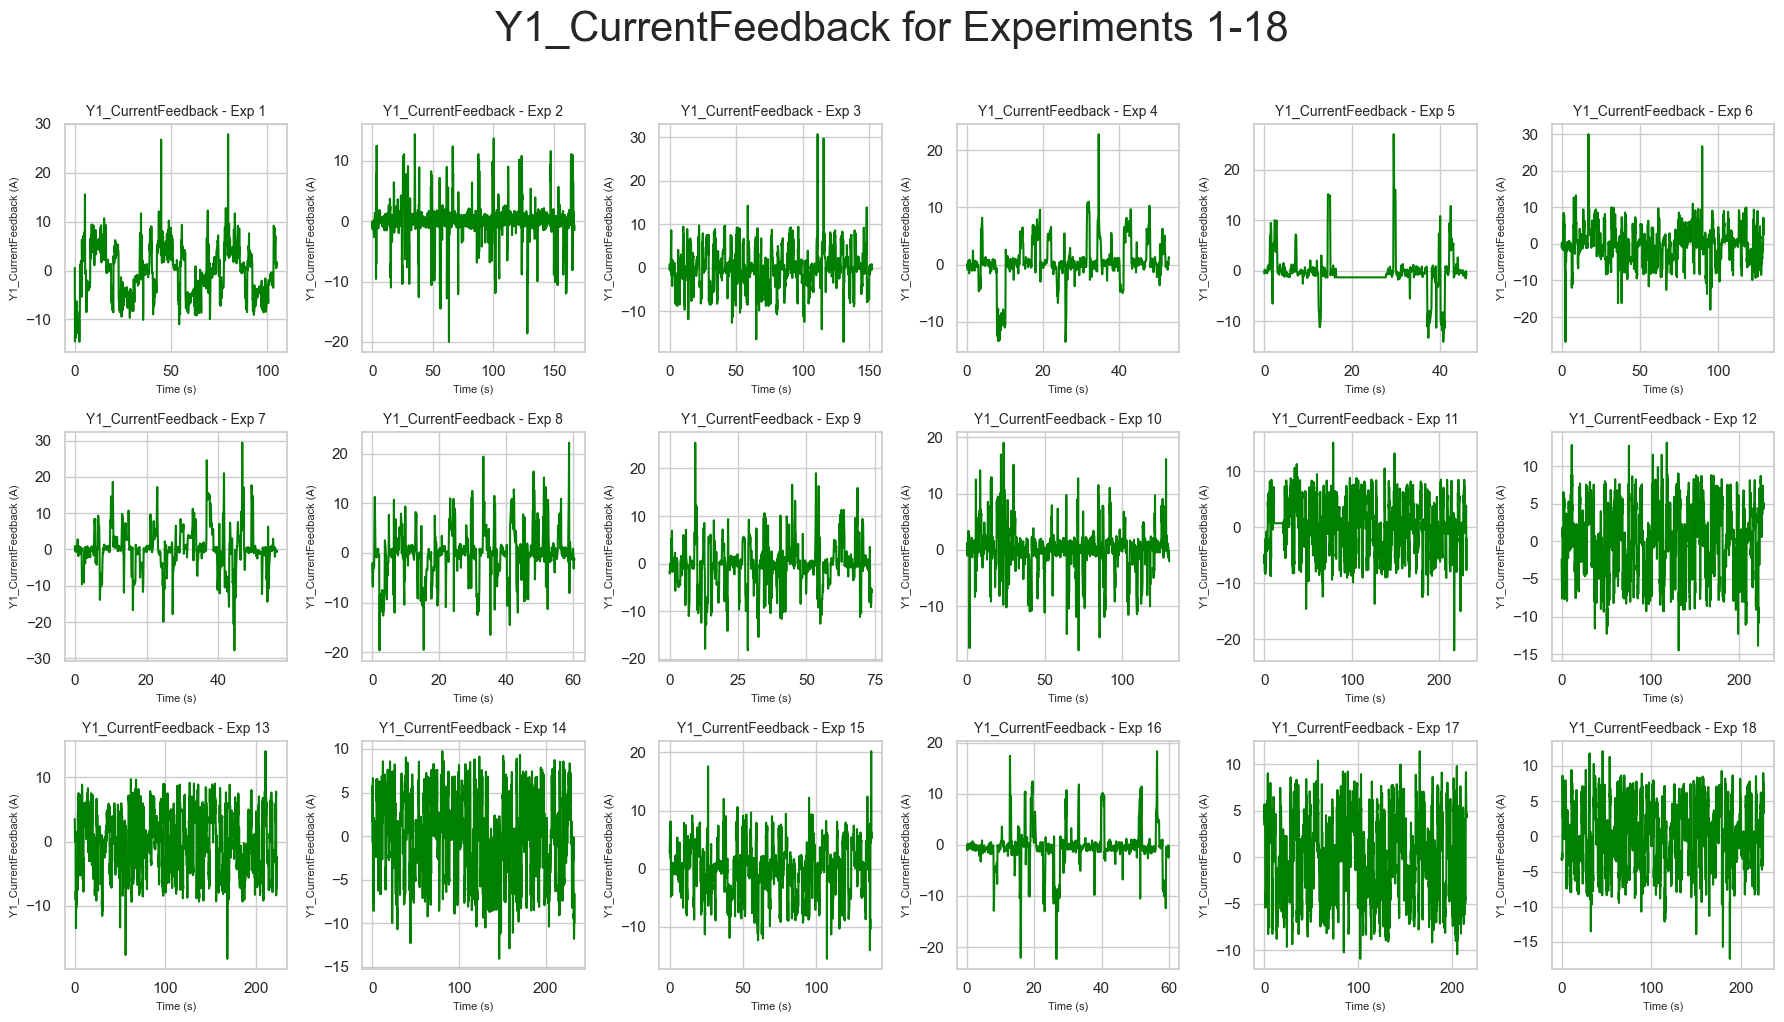

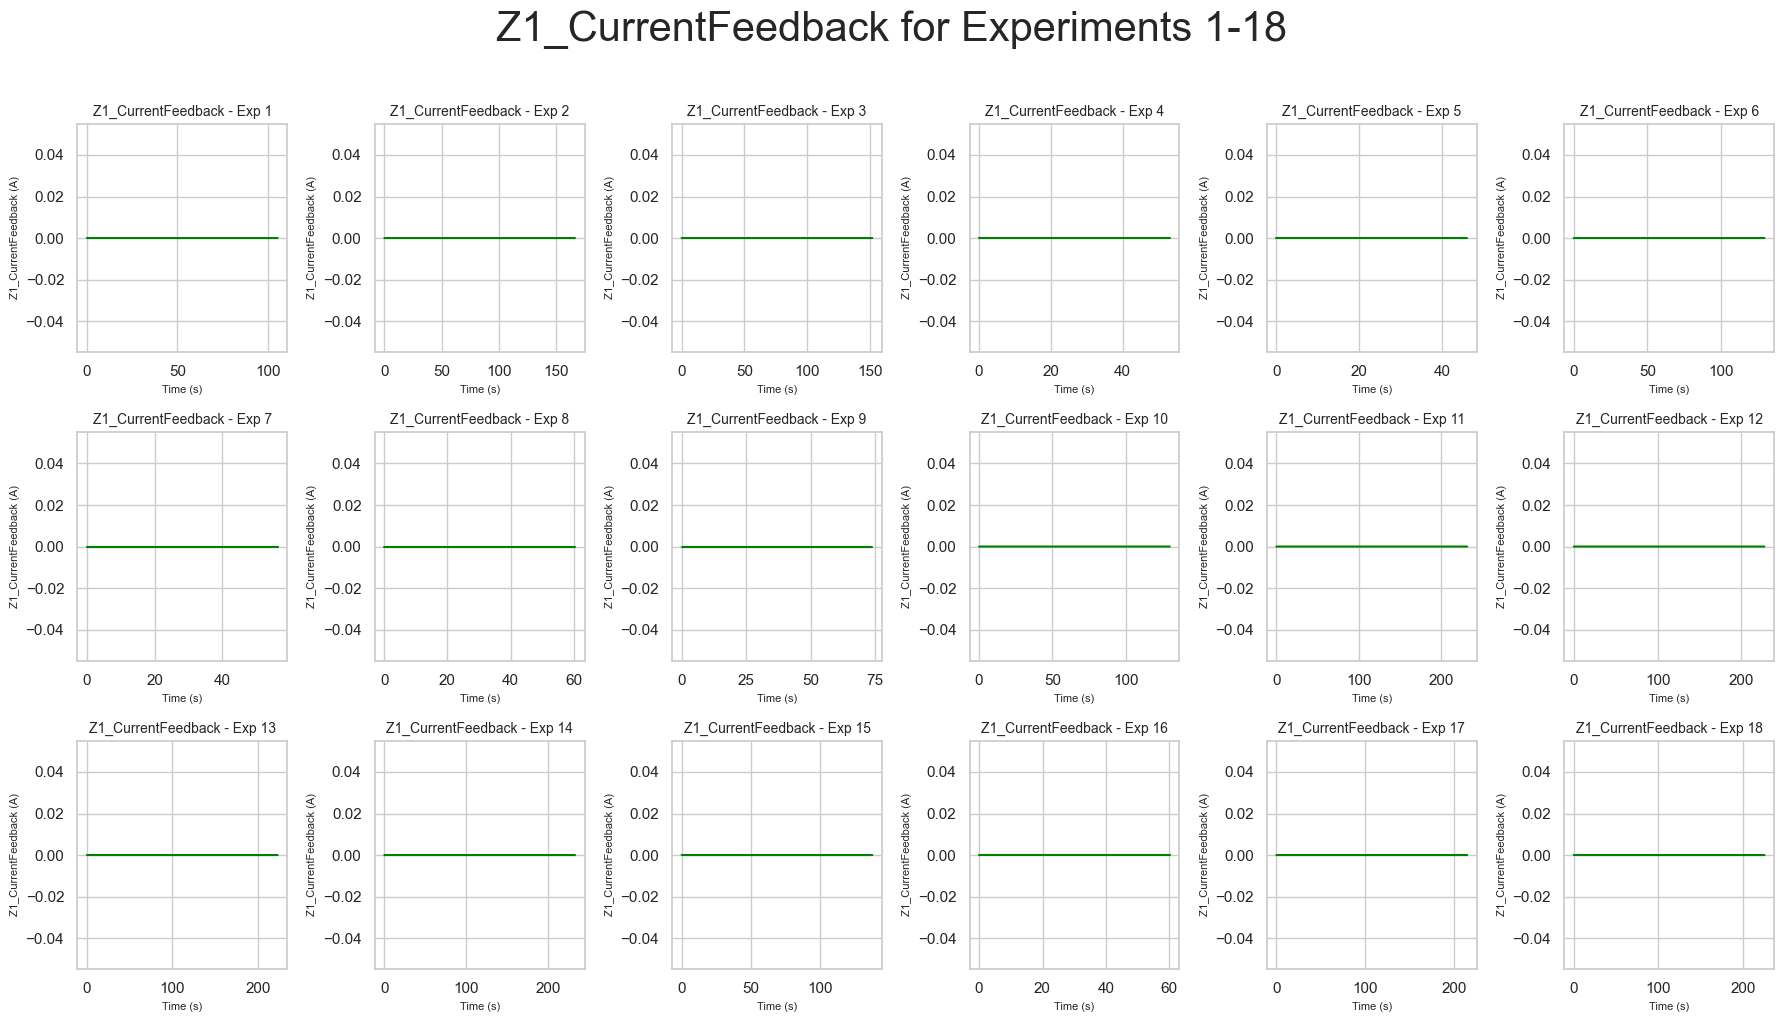

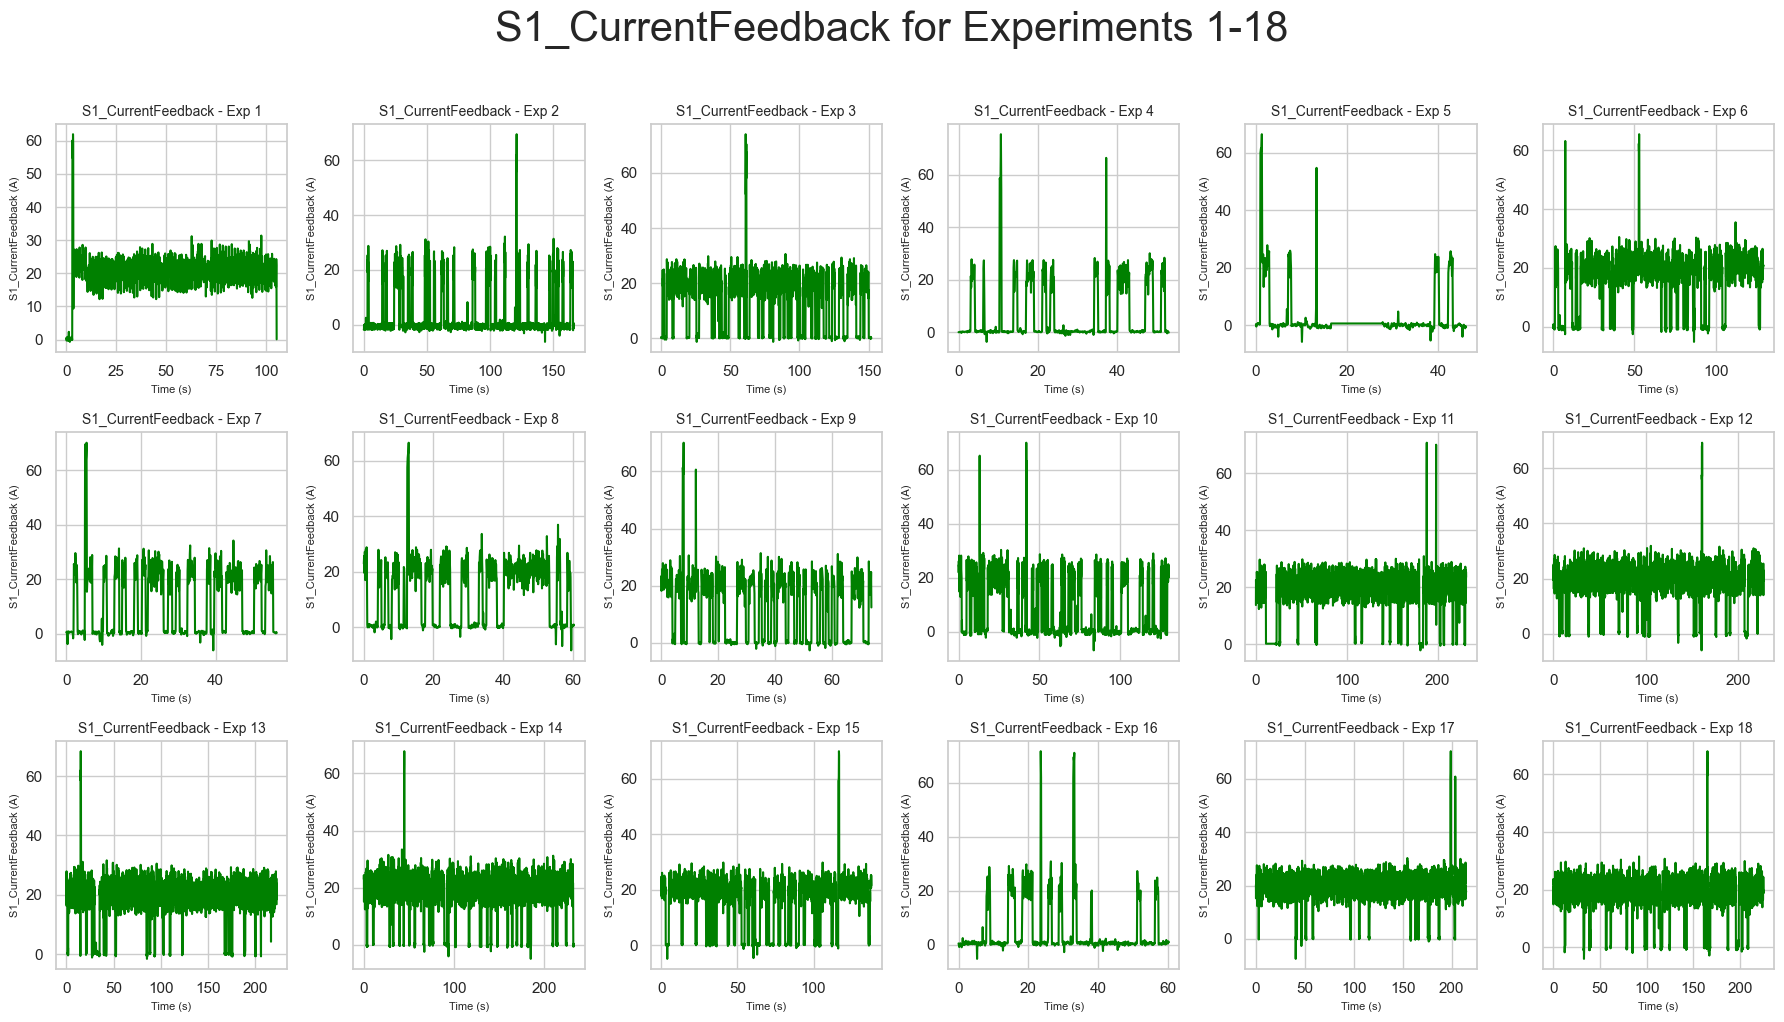

In [10]:
plot_time_all_experiments(experiments, "X1_CurrentFeedback", "X1_CurrentFeedback (A)", "green", "X1_CurrentFeedback for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_CurrentFeedback", "Y1_CurrentFeedback (A)", "green","Y1_CurrentFeedback for Experiments 1-18")
plot_time_all_experiments(experiments, "Z1_CurrentFeedback", "Z1_CurrentFeedback (A)", "green", "Z1_CurrentFeedback for Experiments 1-18")
plot_time_all_experiments(experiments, "S1_CurrentFeedback", "S1_CurrentFeedback (A)", "green","S1_CurrentFeedback for Experiments 1-18")


## Plotting Acceleration vs Time

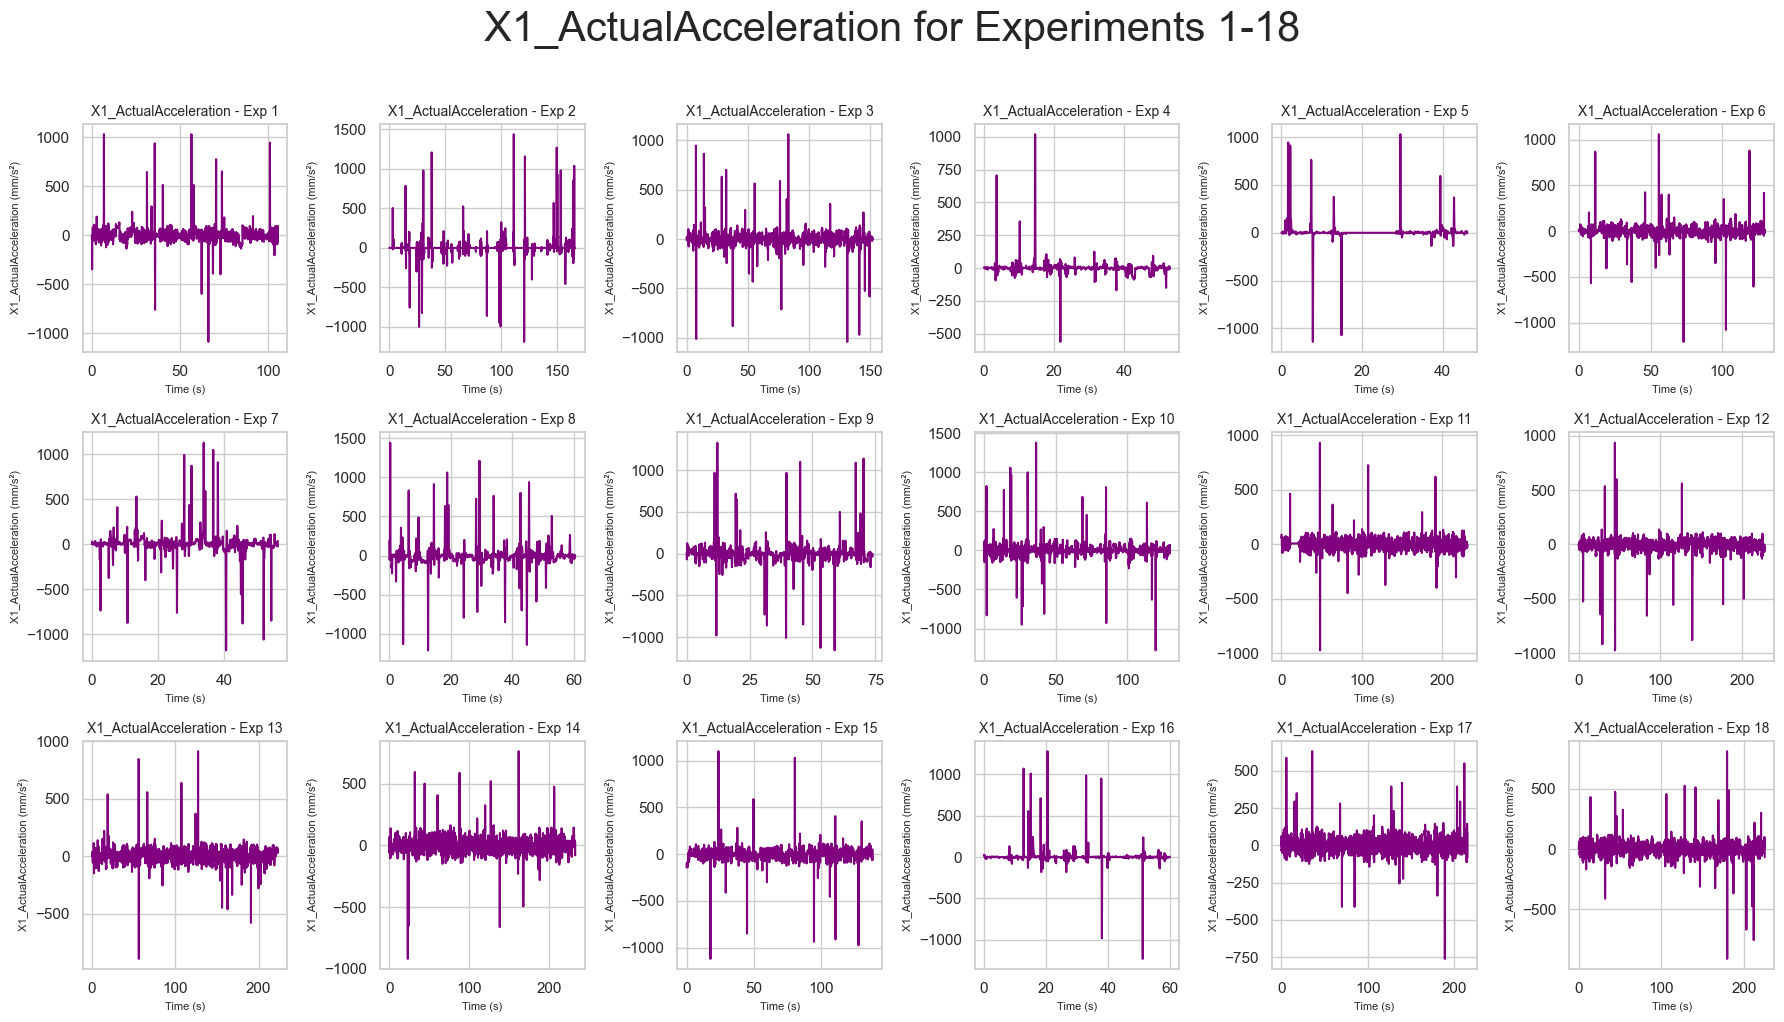

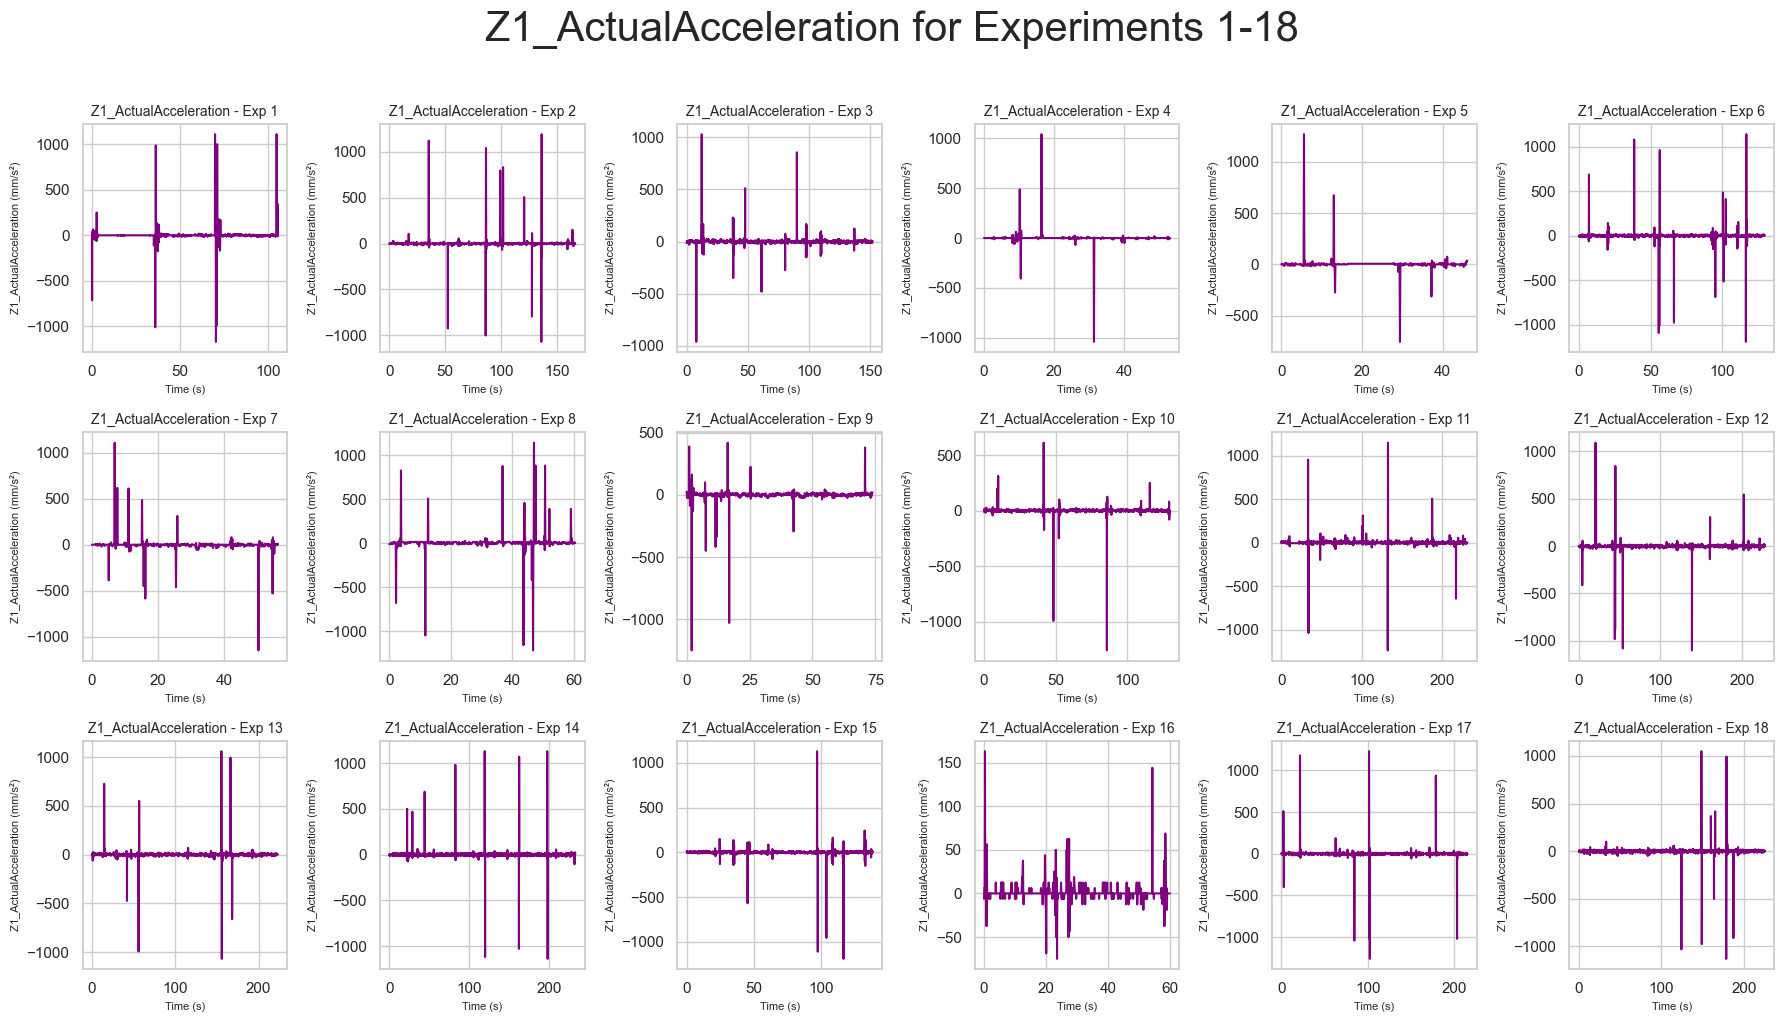

In [11]:
plot_time_all_experiments(experiments, "X1_ActualAcceleration", "X1_ActualAcceleration (mm/s²)", "purple", "X1_ActualAcceleration for Experiments 1-18")
plot_time_all_experiments(experiments, "Z1_ActualAcceleration", "Z1_ActualAcceleration (mm/s²)", "purple", "Z1_ActualAcceleration for Experiments 1-18")


## Plotting Posiion vs Time

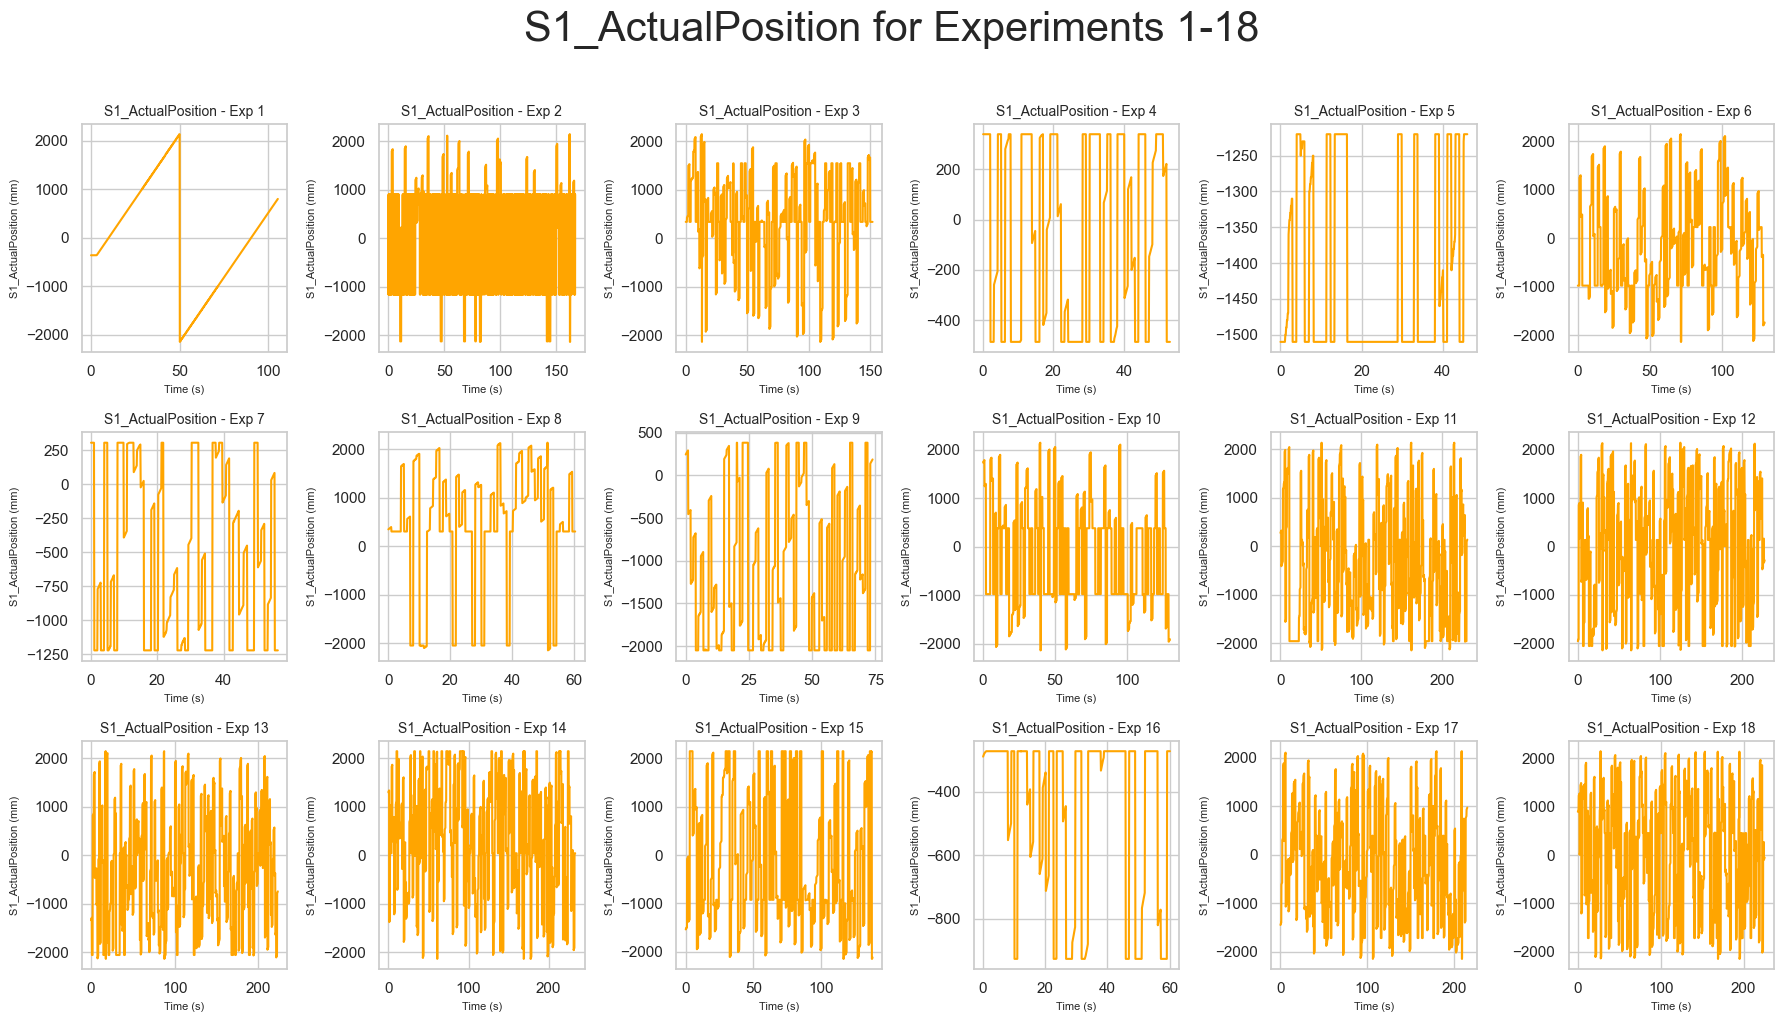

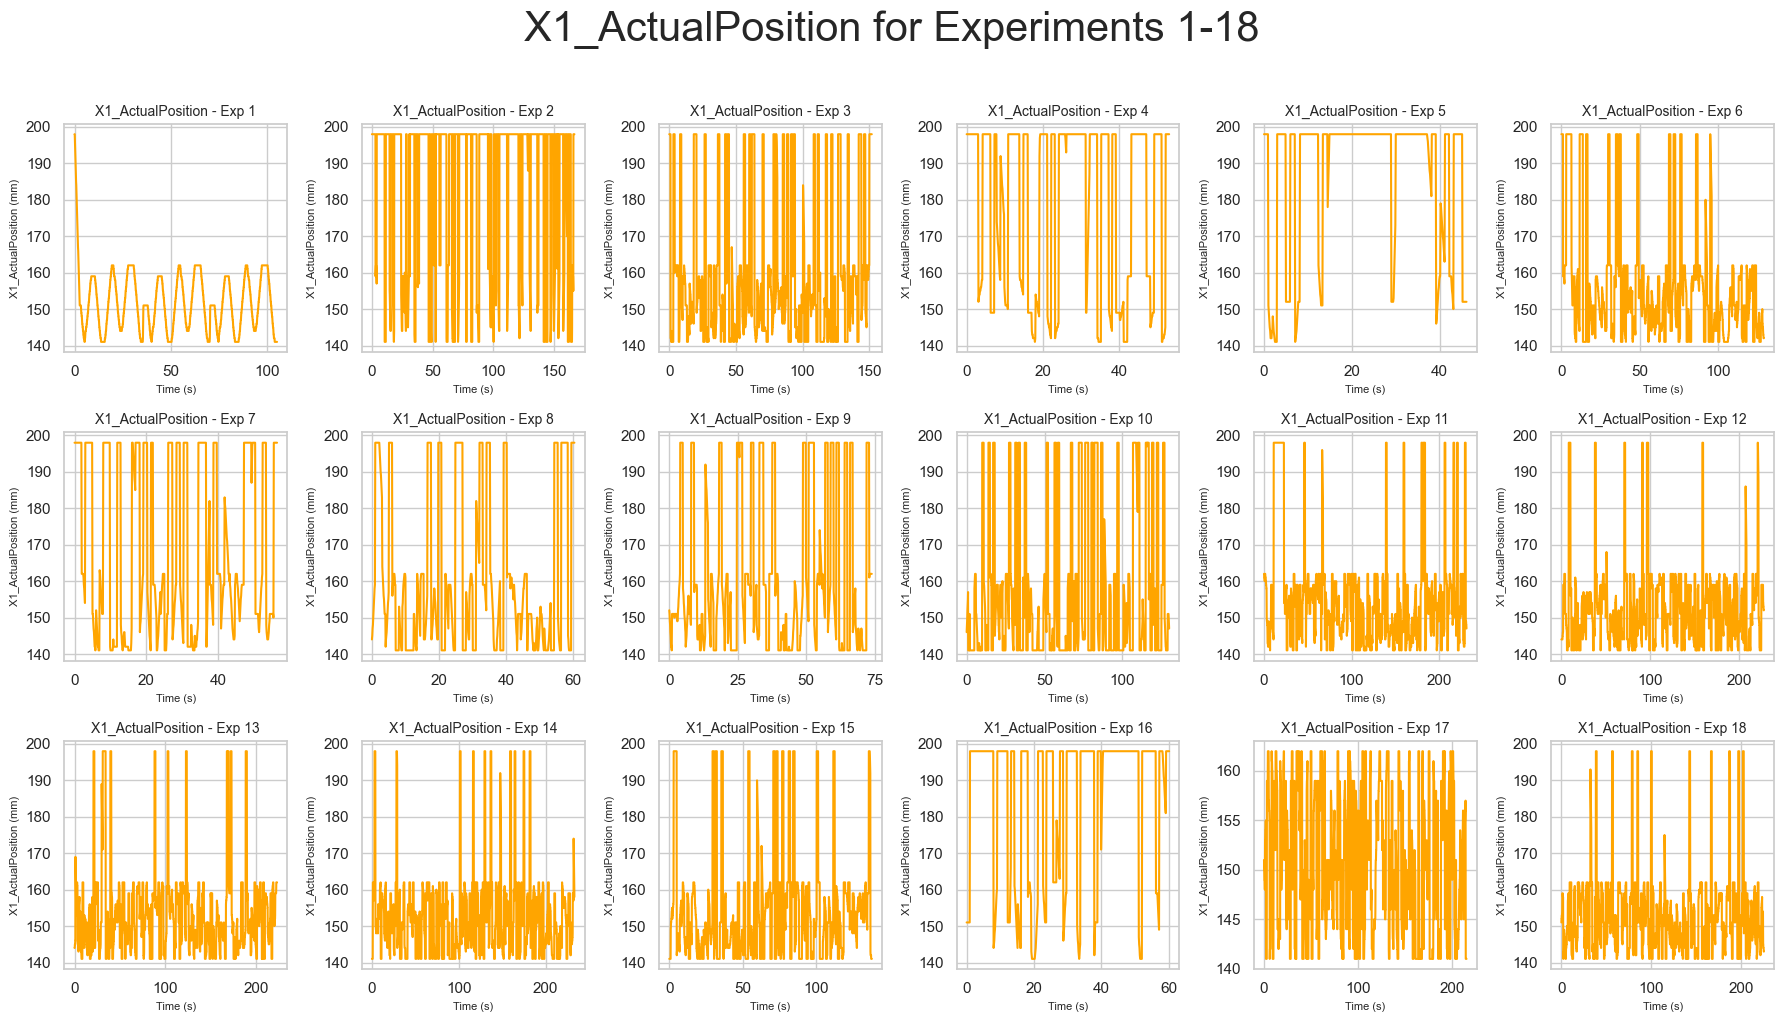

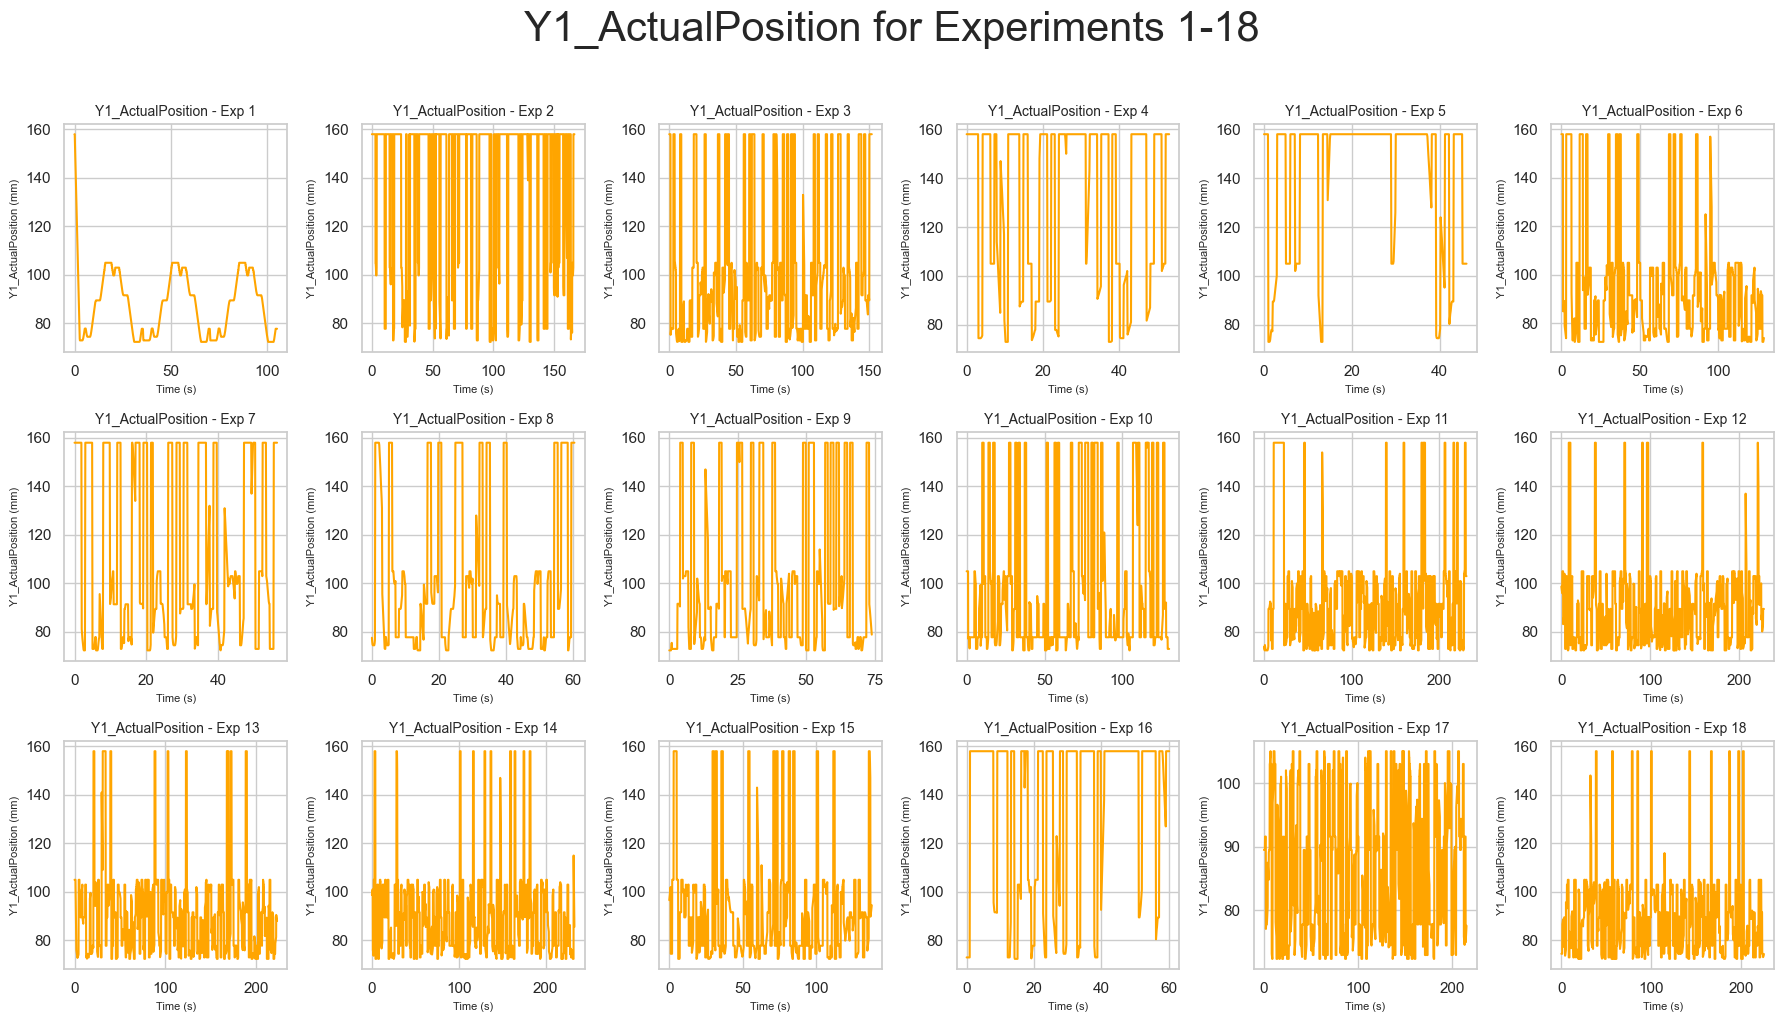

In [12]:
plot_time_all_experiments(experiments, "S1_ActualPosition", "S1_ActualPosition (mm)", "orange", "S1_ActualPosition for Experiments 1-18")
plot_time_all_experiments(experiments, "X1_ActualPosition", "X1_ActualPosition (mm)", "orange", "X1_ActualPosition for Experiments 1-18")
plot_time_all_experiments(experiments, "Y1_ActualPosition", "Y1_ActualPosition (mm)", "orange", "Y1_ActualPosition for Experiments 1-18")


## Plotting Machining Controller Channel vs Time

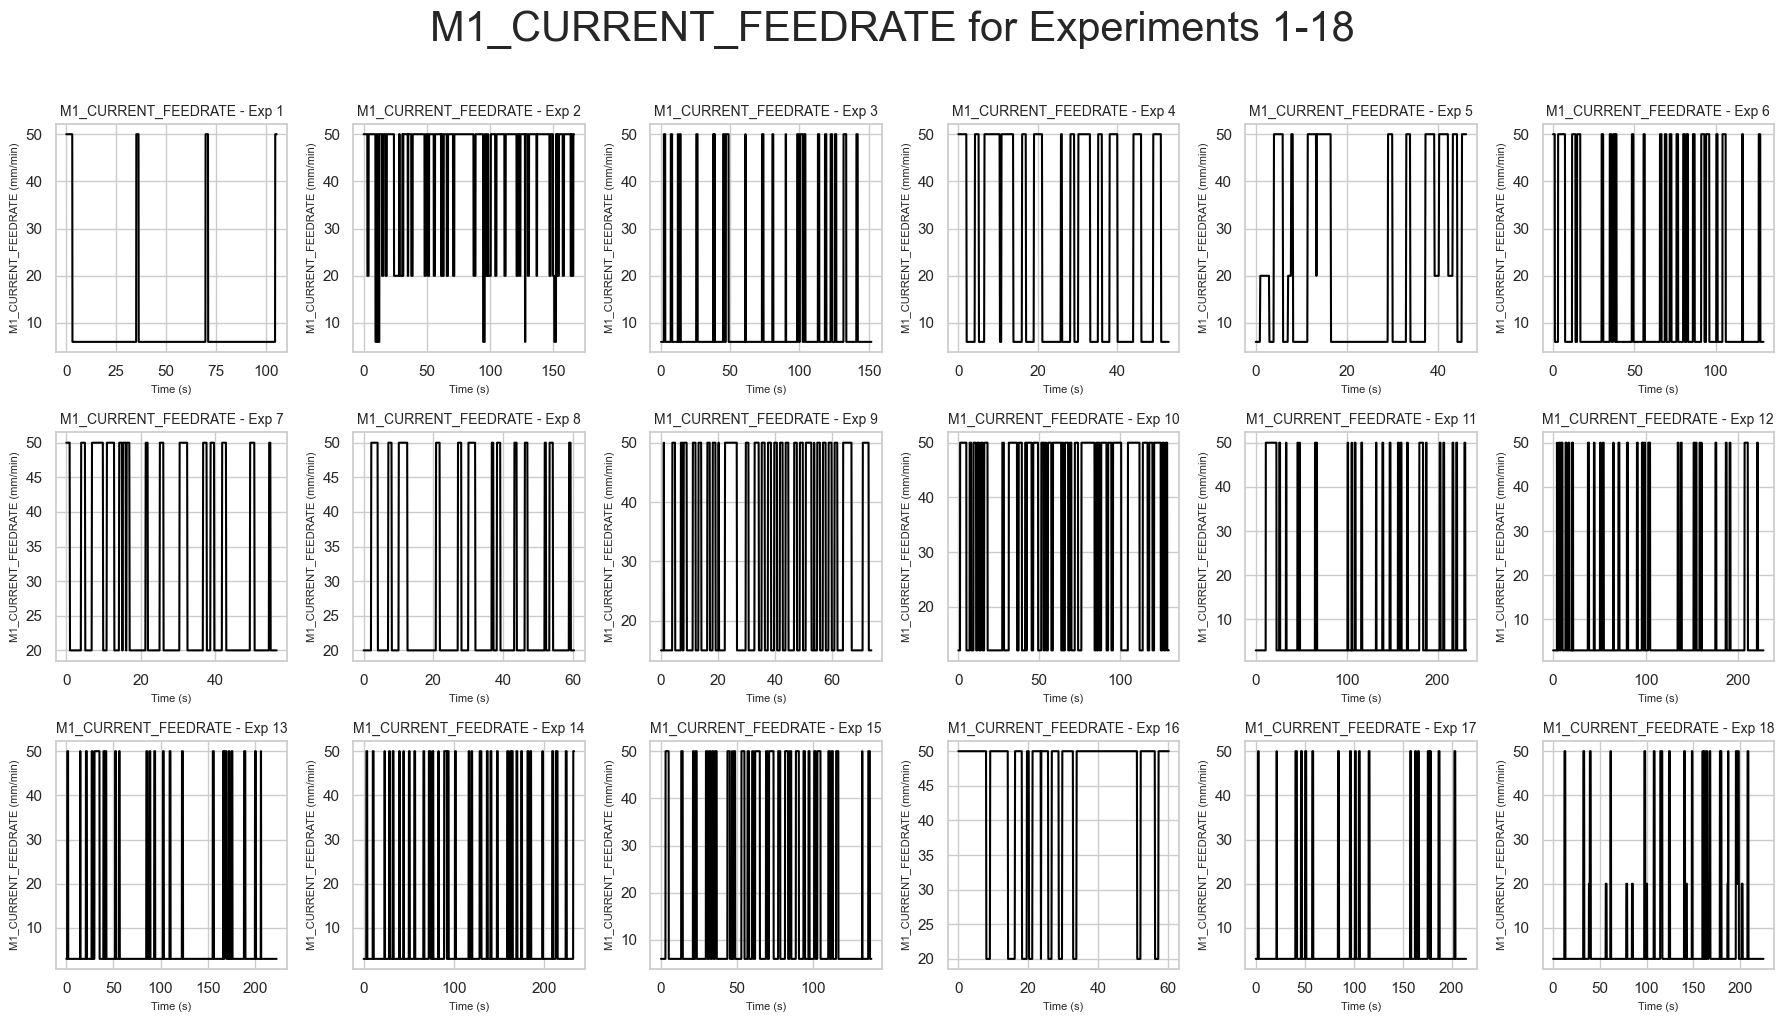

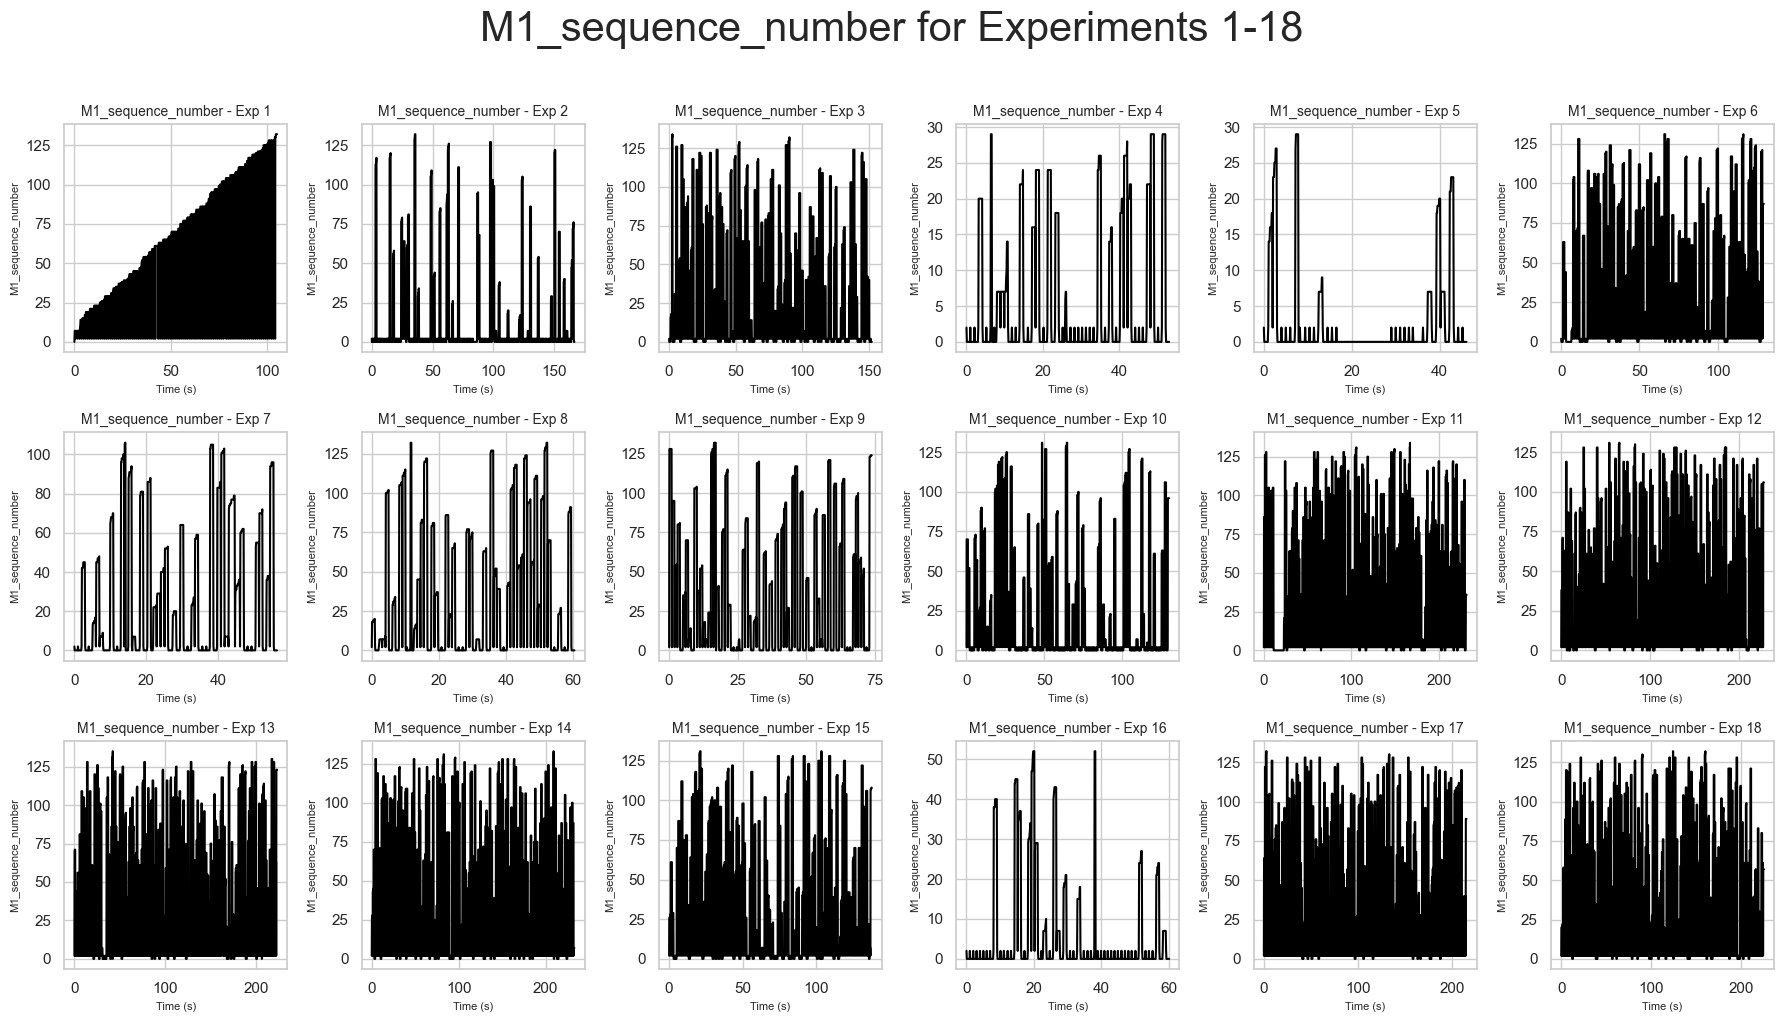

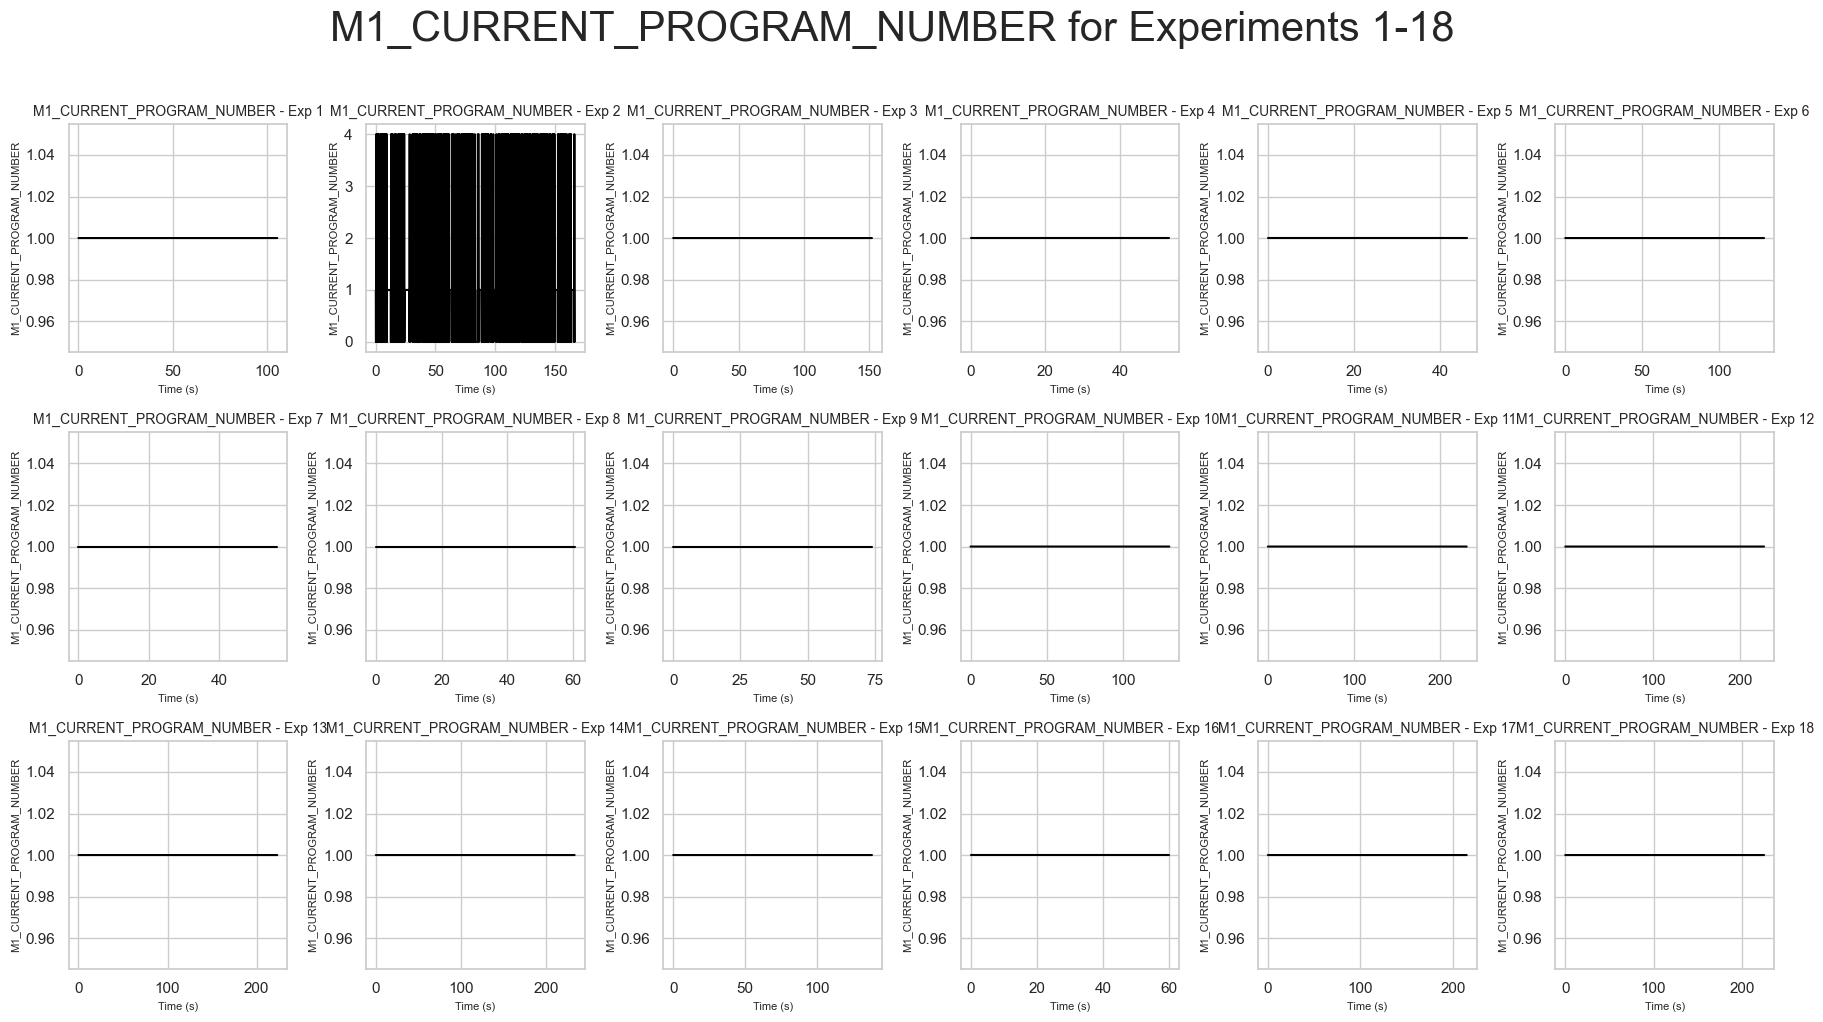

In [13]:
plot_time_all_experiments(experiments, "M1_CURRENT_FEEDRATE", "M1_CURRENT_FEEDRATE (mm/min)", "black", "M1_CURRENT_FEEDRATE for Experiments 1-18")
plot_time_all_experiments(experiments, "M1_sequence_number", "M1_sequence_number", "black", "M1_sequence_number for Experiments 1-18")
plot_time_all_experiments(experiments, "M1_CURRENT_PROGRAM_NUMBER", "M1_CURRENT_PROGRAM_NUMBER", "black", "M1_CURRENT_PROGRAM_NUMBER for Experiments 1-18")


## Plotting Feature Importance for Determining if Part is Successful or Not

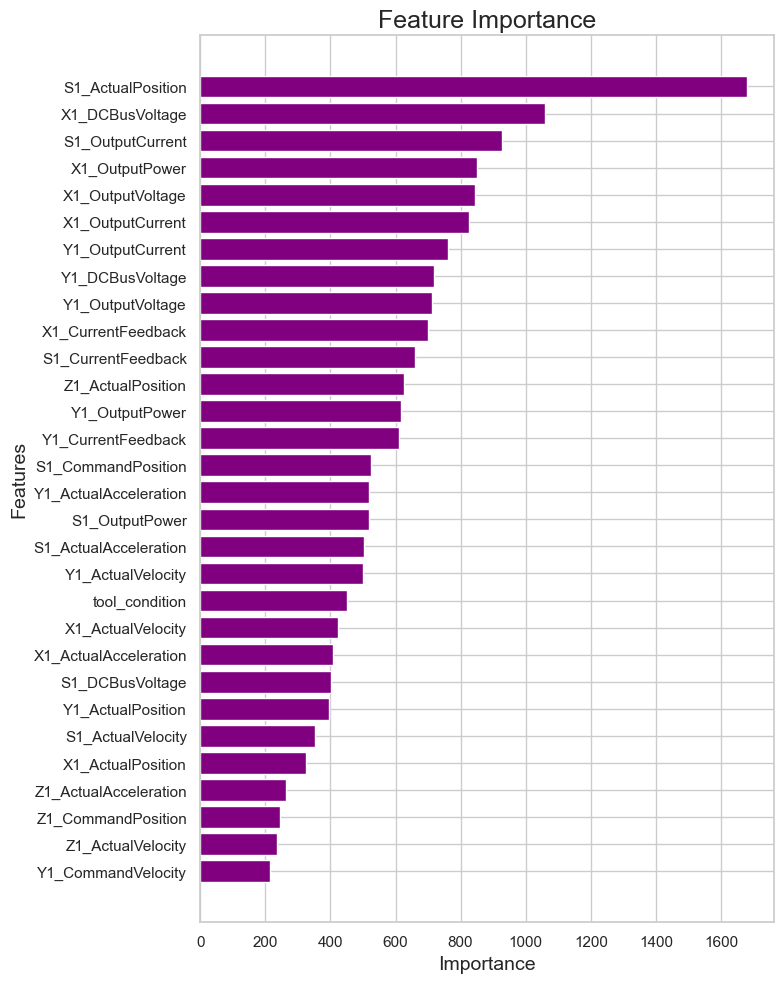

In [14]:
from data_processing import compute_feature_importance
from utils import plot_feature_importance   

feat_imp = compute_feature_importance()
plot_feature_importance(feat_imp, top_n=30)

## Individual Model Training
Individual models will be trained using the previously pre-processed data. Models will be tested and comapred according to the forumlated windowed test data with window size of 10. 

For this time-series machine learning study done on CNC Toolwear data, we decided to train and compare the following models:

- LSTM (Long Short Term Memory)
- GRU (Gated Recurrent Unit)
- TCN (Temporal Convolution Network)
- Transformer



### **LSTM Model**

*The below cells outline the training and testing of our LSTM model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**LSTM Model Design**

*The following architecture and parameters were used for our baseline LSTM Model*

In [15]:
# Insert outline of model architecture and any nescasary figures and hyperparameters. 
import sys
sys.path.append("../scripts")  # so Jupyter can see lstm_run.py

from lstm_run import build_baseline_model

# Fake input shape just to display architecture (real shape comes after loading data)
example_model = build_baseline_model((10, 25))
example_model.summary() 

**Timing and Training of the Baseline LSTM Model**

In [16]:
# Insert call to the training method of the LSTM model here.
# Make sure to start and end time before and after the method call.

# Report time taken for training.

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Baseline Training Time: 20.174485445022583 seconds


**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

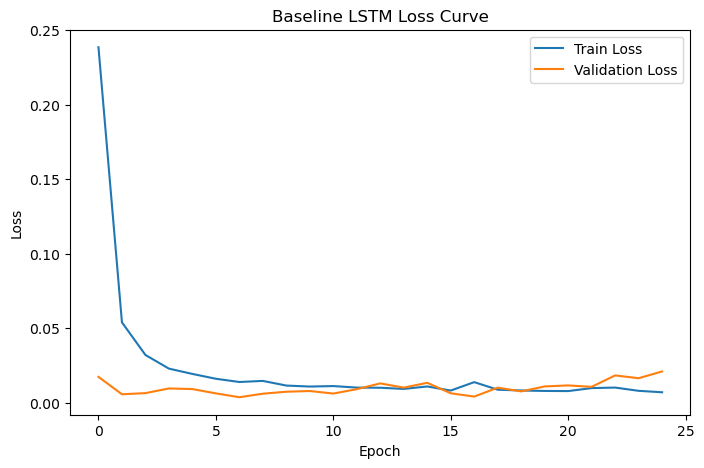

In [17]:
# Insert code to get train vs. validaton loss per epoch plot

After observing the plot above it is clear that our model is not overfitting and working very well.

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

In [18]:
# Insert call to get the metrics for the LSTM model on the test set.

Accuracy: 0.9226475279106858
Precision: 0.9004106776180698
Recall: 1.0
F1: 0.9475958941112912

Confusion Matrix:
 [[1400  485]
 [   0 4385]]


**Hyperparameter Optimization for the LSTM Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate (0.0001, 0.002)
- etc.


In [19]:
# Insert call to get Hyperprameter Optimization results.

# Output best values found during tuning.

Testing {'lstm_units': 64, 'dropout': 0.0, 'lr': 0.001}
Testing {'lstm_units': 64, 'dropout': 0.2, 'lr': 0.001}
Testing {'lstm_units': 64, 'dropout': 0.3, 'lr': 0.001}
Testing {'lstm_units': 64, 'dropout': 0.0, 'lr': 0.0005}
Testing {'lstm_units': 64, 'dropout': 0.2, 'lr': 0.0005}
Testing {'lstm_units': 64, 'dropout': 0.3, 'lr': 0.0005}
Testing {'lstm_units': 64, 'dropout': 0.0, 'lr': 0.0003}
Testing {'lstm_units': 64, 'dropout': 0.2, 'lr': 0.0003}
Testing {'lstm_units': 64, 'dropout': 0.3, 'lr': 0.0003}

Best Hyperparameters Found:
 {'lstm_units': 64, 'dropout': 0.3, 'lr': 0.001}


**Retraining LSTM  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [20]:
# Insert code to retrain model using best hyperparameters on full training set as well as total train time.

196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Optimized Training Time: 20.770793914794922 seconds
=== Optimized Model Performance on Test Set ===
Accuracy:  0.9174
Precision: 0.8944
Recall:    1.0000
F1 Score:  0.9442

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.7252    0.8407      1885
           1     0.8944    1.0000    0.9442      4385

    accuracy                         0.9174      6270
   macro avg     0.9472    0.8626    0.8925      6270
weighted avg     0.9261    0.9174    0.9131      6270

Confusion Matrix:
[[1367  518]
 [   0 4385]]


**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

In [21]:
# Insert code to compare both training times with a bar plot.

Baseline Training Time: 20.174485445022583
Optimized Training Time: 20.770793914794922


**Comparison of Training and Validation Loss for the Optimzied Model And Base Model**

*The below plot shows the comparison between Training and Validation Loss during training*

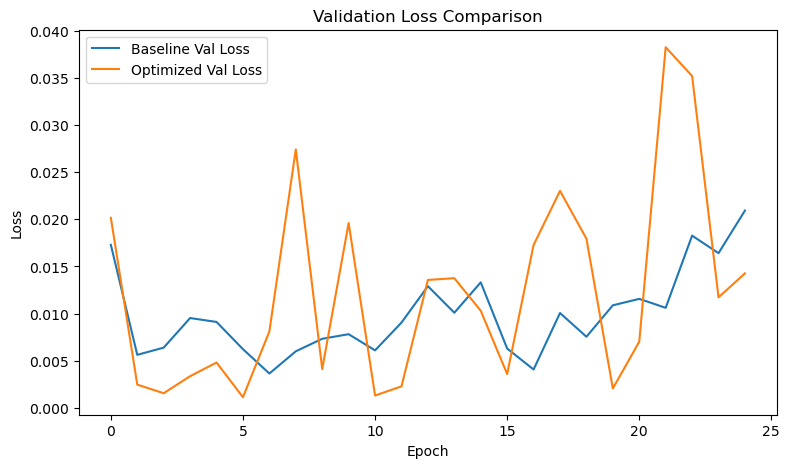

In [22]:
# Insert call to get the plot of Training vs, Validation Loss for the final model during training.

# Also display the previous baseline plot to show comparison before and after HPO.

**Final Comparison of Baseline vs. Optimized LSTM Models**

*The below plots show the effectiveness of our HPO performed on the LSTM Model for the CNC Toolwear Dataset.*

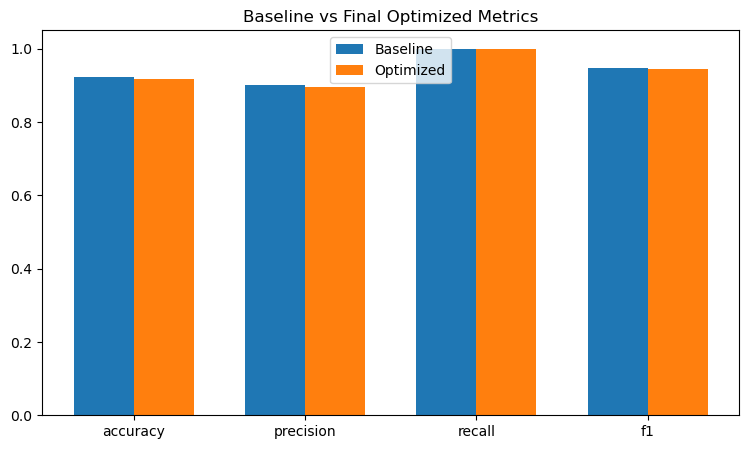

In [24]:
# Insert call to create plots comparing the metrics of the two models.

**Overall Summary of LSTM Model Training**

After completing the training of our LSTM Model We can see that the initialy chosen values for our hyper parameters are the same as the ones found using HPO so there is little to no difference with how the models perform (Other than the non tuned parameters). The model Works very well, showing no signs of overfitting and a good overall accuracy.

### **GRU Model**

*The below cells outline the training and testing of our GRU model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**GRU Model Design**

talk about gru model

In [25]:
import os, sys

project_root = r"C:\Users\aaron\OneDrive\Documents\Year 4\AISE 4010A\Project\CNC-Tool-Wear"
os.chdir(project_root)

scripts_path = os.path.join(project_root, "scripts")
sys.path.append(scripts_path)

from gru_run import train_gru_baseline

train_path = "./data/data_windowed_csv/train_windows_w10.csv"
val_path   = "./data/data_windowed_csv/val_windows_w10.csv"

model, history, train_time, window_len, num_features, weights = train_gru_baseline(
    train_path, val_path
)

model.summary()





Epoch 1/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9453 - loss: 0.0330 - val_accuracy: 0.9877 - val_loss: 0.0119
Epoch 2/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9814 - loss: 0.0117 - val_accuracy: 0.9970 - val_loss: 0.0016
Epoch 3/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9867 - loss: 0.0078 - val_accuracy: 0.9962 - val_loss: 0.0027
Epoch 4/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9871 - loss: 0.0068 - val_accuracy: 0.9873 - val_loss: 0.0086
Epoch 5/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9905 - loss: 0.0060 - val_accuracy: 0.9946 - val_loss: 0.0035
Epoch 6/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9912 - loss: 0.0045 - val_accuracy: 0.9970 - val_loss: 0.0025
Epoch 7/40
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9929 - loss: 0.0037 - val_accuracy: 0.9952 - val_loss: 0.0046


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 64)         │        17,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,909 (327.77 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,940 (218.52 KB)

**Timing and Training of the Baseline GRU Model**

In [26]:

print("Training Time: " + str(train_time) + " s")


Training Time: 27.799320697784424 s


**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

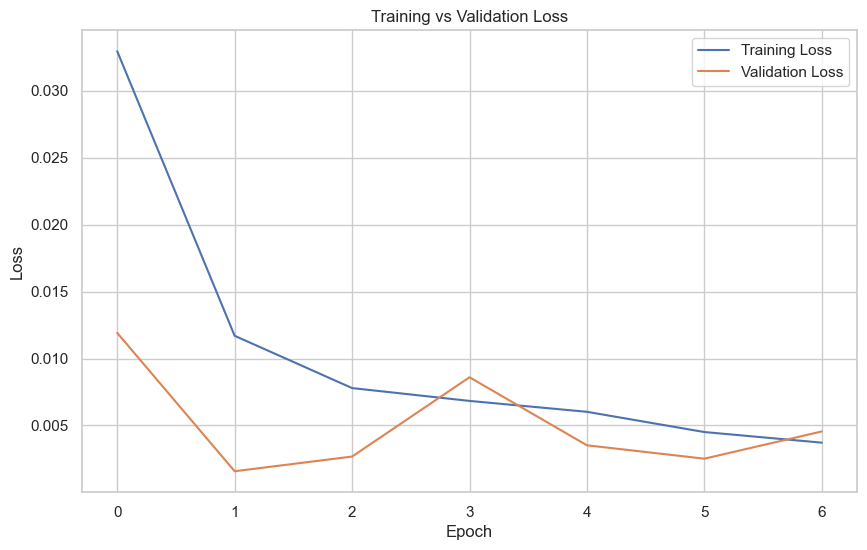

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history["loss"], label="Training Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Looking at the plot above, we can see that both the training loss and validation loss go down as the number of epochs increases.  This means the GRU model is learning properly. The validation loss follows the training loss pretty closely and does not suddenly spike or drift away, which tells us the model is not overfitting.
There are small ups and downs in the curves near the end, but that’s normal. Overall, the model trains smoothly and generalizes well to the validation data.

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9118022328548644
Precision: 0.8880113406237343
Recall: 1.0
F1 Score: 0.9406843290786228


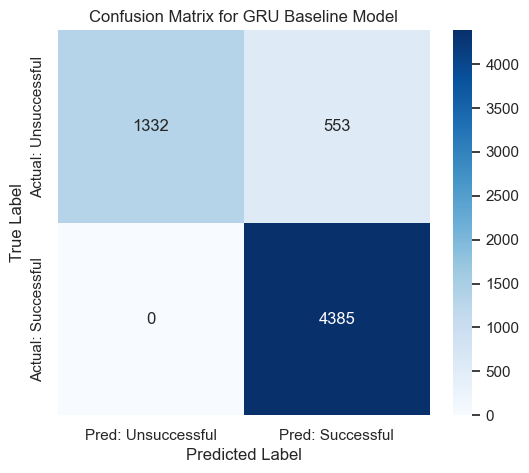

In [30]:
from gru_run import load_window_csv
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

test_path = "data/data_windowed_csv/test_windows_w10.csv"

X_test, y_test, _, _ = load_window_csv(test_path)
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
cm   = confusion_matrix(y_test, y_pred)

print("Accuracy:",  acc)
print("Precision:", prec)
print("Recall:",    rec)
print("F1 Score:",  f1)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: Unsuccessful", "Pred: Successful"],
            yticklabels=["Actual: Unsuccessful", "Actual: Successful"])

plt.title("Confusion Matrix for GRU Baseline Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




**Hyperparameter Optimization for the GRU Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate: (0.001, 0.0005, 0.0002)
- Units: (32, 64, 128)
- dropouts: (0.2, 0.4, 0.5)
- batch size: (20, 40, 60)


In [32]:

import sys
sys.path.append("../scripts")
from gru_run import tune_gru

train_path = "data/data_windowed_csv/train_windows_w10.csv"
val_path   = "data/data_windowed_csv/val_windows_w10.csv"

best_config, best_loss = tune_gru(
    train_path,
    val_path,
    learning_rates=[0.001, 0.0005, 0.0002],
    units=[32, 64, 128],
    dropouts=[0.2, 0.4, 0.5],
    batch_sizes=[20, 40, 60]
)

print("Best Values for Training:\n")
best_config, best_loss



Testing config: LR=0.001, Units=32, Dropout=0.2, Batch=20

Testing config: LR=0.001, Units=32, Dropout=0.2, Batch=40

Testing config: LR=0.001, Units=32, Dropout=0.2, Batch=60

Testing config: LR=0.001, Units=32, Dropout=0.4, Batch=20

Testing config: LR=0.001, Units=32, Dropout=0.4, Batch=40

Testing config: LR=0.001, Units=32, Dropout=0.4, Batch=60

Testing config: LR=0.001, Units=32, Dropout=0.5, Batch=20

Testing config: LR=0.001, Units=32, Dropout=0.5, Batch=40

Testing config: LR=0.001, Units=32, Dropout=0.5, Batch=60

Testing config: LR=0.001, Units=64, Dropout=0.2, Batch=20

Testing config: LR=0.001, Units=64, Dropout=0.2, Batch=40

Testing config: LR=0.001, Units=64, Dropout=0.2, Batch=60

Testing config: LR=0.001, Units=64, Dropout=0.4, Batch=20

Testing config: LR=0.001, Units=64, Dropout=0.4, Batch=40

Testing config: LR=0.001, Units=64, Dropout=0.4, Batch=60

Testing config: LR=0.001, Units=64, Dropout=0.5, Batch=20

Testing config: LR=0.001, Units=64, Dropout=0.5, Batch=

({'learning_rate': 0.001, 'units': 128, 'dropout': 0.2, 'batch_size': 20},
 0.0003477096906863153)

**Retraining GRU  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [1]:
import sys
sys.path.append("../scripts")
from gru_run import train_gru_optimized


best_config = {
    "learning_rate": 0.001,
    "units": 128,
    "dropout": 0.2,
    "batch_size": 20
}

model, history, train_time, wlen, nfeat = train_gru_optimized(
    "../data/data_windowed_csv/train_windows_w10.csv",
    "../data/data_windowed_csv/val_windows_w10.csv",
    best_config
)



model.summary()
print("Training Time: " + str(train_time) + " s")


Retraining GRU Model with Optimized Hyperparameters:
{'learning_rate': 0.001, 'units': 128, 'dropout': 0.2, 'batch_size': 20}
Epoch 1/40
692/692 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9584 - loss: 0.0264 - val_accuracy: 0.9914 - val_loss: 0.0047
Epoch 2/40
692/692 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9788 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 2.6916e-04
Epoch 3/40
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9871 - loss: 0.0081 - val_accuracy: 0.9952 - val_loss: 0.0033
Epoch 4/40
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9875 - loss: 0.0077 - val_accuracy: 0.9956 - val_loss: 0.0034
Epoch 5/40
692/692 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9890 - loss: 0.0067 - val_accuracy: 0.9992 - val_loss: 5.3305e-04
Epoch 6/40
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9882 - loss: 0.0072 - val_accuracy: 0.9990 - val_loss: 0.0012
Epoch 7/40
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9924 - loss: 0.0038 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 128)        │        59,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,645 (1.13 MB)

 Trainable params: 98,881 (386.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 197,764 (772.52 KB)

Training Time: 62.282320499420166 s


**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

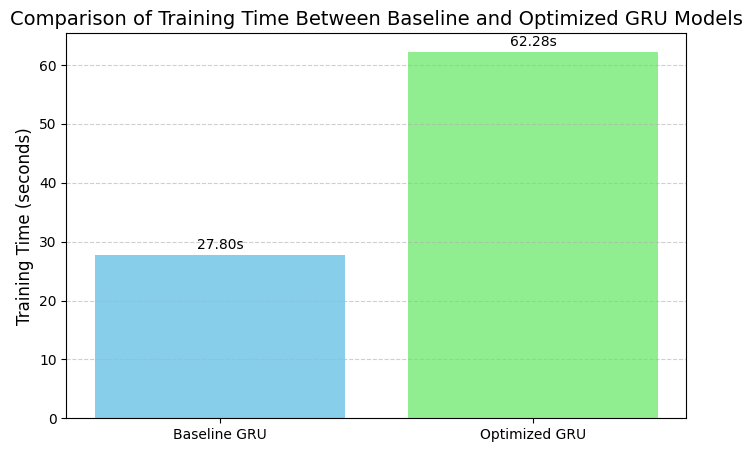

In [ ]:
import matplotlib.pyplot as plt
baseline_time = 27.80     
optimized_time = 62.28     

plt.figure(figsize=(8, 5))
plt.bar(
    ["Baseline GRU", "Optimized GRU"],
    [baseline_time, optimized_time],
    color=["skyblue", "lightgreen"]
)

plt.title("Comparison of Training Time Between Baseline and Optimized GRU Models", fontsize=14)
plt.ylabel("Training Time (seconds)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.text(0, baseline_time + 1, f"{baseline_time:.2f}s", ha='center')
plt.text(1, optimized_time + 1, f"{optimized_time:.2f}s", ha='center')

plt.show()

**Comparison of Training and Validation Loss for the Optimzied Model**

*The below plot shows the comparison between Training and Validation Loss during training*

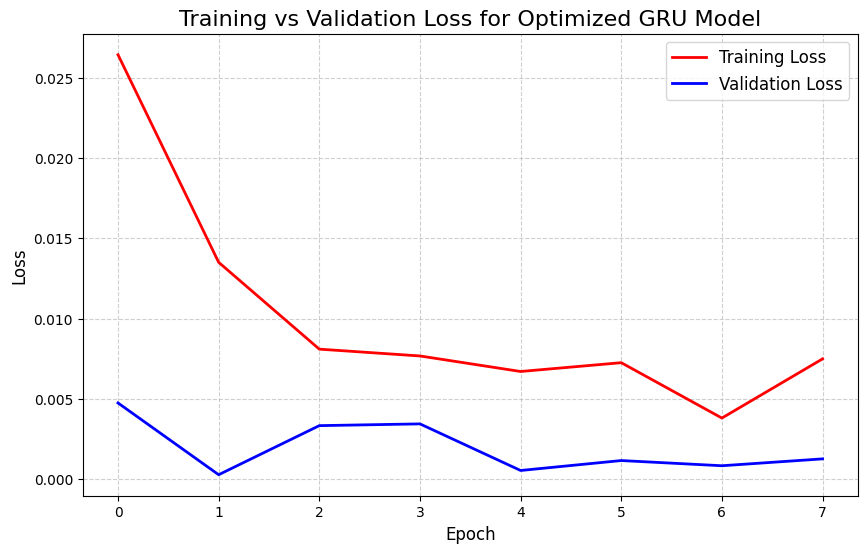

In [2]:

import matplotlib.pyplot as plt


train_loss = history["loss"]
val_loss   = history["val_loss"]

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training Loss", linewidth=2, color = "red")
plt.plot(val_loss, label="Validation Loss", linewidth=2, color = "blue")

plt.title("Training vs Validation Loss for Optimized GRU Model", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()



## Difference Between Original and Optimized GRU Models

The original GRU model is much smaller and trains quickly, but it has limited capacity to learn complex patterns in the machining data.  Its loss curve is smooth and stable, but it doesn’t capture as much detail.  The optimized GRU model is larger, with more units and parameters, which allows it to learn deeper relationships in the signal data.  This gives it lower validation loss overall, meaning it performs better.  However, because it is more complex, it takes longer to train and shows small fluctuations in the loss curve.
the original model is fast and stable, while the optimized model is slower but more accurate and better at learning the data.

**Optimized Model Metrics**

*After completing HPO, the accuracy, precison, f1-score, recall, and confusion matrix of the optimized model can be seen below.*

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9156299840510367
Precision: 0.8923483923483924
Recall: 1.0
F1 Score: 0.9431121625981288


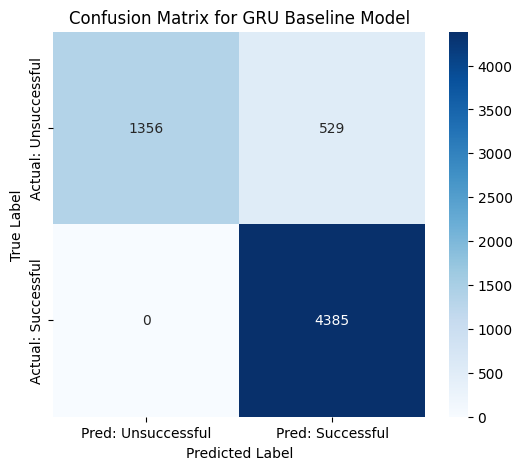

In [4]:
from gru_run import load_window_csv
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

test_path = "../data/data_windowed_csv/test_windows_w10.csv"

X_test, y_test, _, _ = load_window_csv(test_path)
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
cm   = confusion_matrix(y_test, y_pred)

print("Accuracy:",  acc)
print("Precision:", prec)
print("Recall:",    rec)
print("F1 Score:",  f1)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: Unsuccessful", "Pred: Successful"],
            yticklabels=["Actual: Unsuccessful", "Actual: Successful"])

plt.title("Confusion Matrix for GRU Baseline Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Final Comparison of Baseline vs. Optimized GRU Models**

*The below plots show the effectiveness of our HPO performed on the GRU Model for the CNC Toolwear Dataset.*

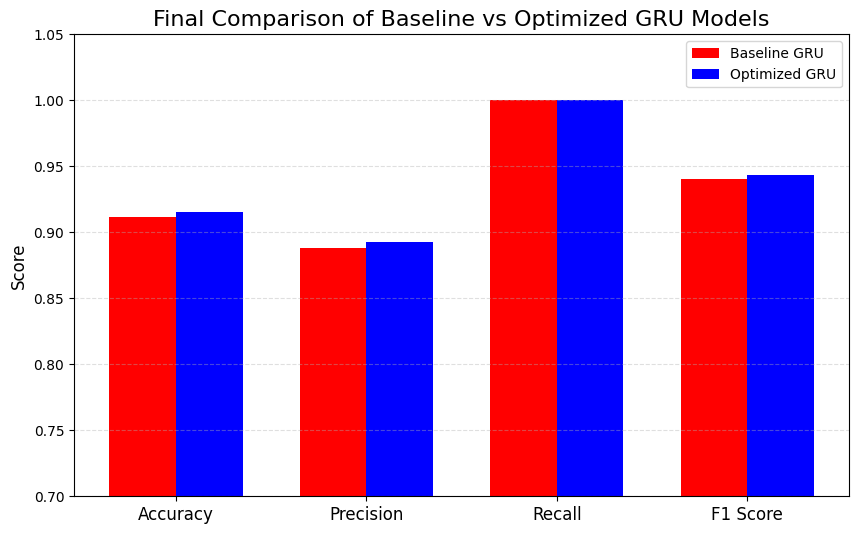

In [9]:
import matplotlib.pyplot as plt
import numpy as np

baseline_accuracy  = 0.9118
baseline_precision = 0.8880
baseline_recall    = 1.0
baseline_f1        = 0.9406


optimized_accuracy  = 0.9118
optimized_precision = 0.8880
optimized_recall    = 1.0
optimized_f1        = 0.9406

optimized_accuracy  = 0.9156
optimized_precision = 0.8923
optimized_recall    = 1.0
optimized_f1        = 0.9431

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

baseline_vals  = [baseline_accuracy, baseline_precision, baseline_recall, baseline_f1]
optimized_vals = [optimized_accuracy, optimized_precision, optimized_recall, optimized_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, baseline_vals, width, label="Baseline GRU", color="red")
plt.bar(x + width/2, optimized_vals, width, label="Optimized GRU", color="blue")

plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Final Comparison of Baseline vs Optimized GRU Models", fontsize=16)
plt.ylim(0.7, 1.05)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()


**Overall Summary of GRU Model Training**

Both models perform extremely well.  The optimized model performs slightly better in metrics like accuracy, precision and recall. However The main improvement from tuning came from lowering the loss curves and giving the model more stable learning, even though the final metrics are almost identical.

### **TCN Model**

*The below cells outline the training and testing of our TCN model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**TCN Model Design**

*The following architecture and parameters were used for our baseline TCN Model*

In [ ]:
# Insert outline of model architecture and any nescasary figures and hyperparameters. 

**Timing and Training of the Baseline TCN Model**

In [ ]:
# Insert call to the training method of the TCN model here.
# Make sure to start and end time before and after the method call.

# Report time taken for training.

**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

In [ ]:
# Insert code to get train vs. validaton loss per epoch plot

After observing the plot above it is clear that our model is.....

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

In [ ]:
# Insert call to get the metrics for the TCN model on the test set.

**Hyperparameter Optimization for the TCN Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate (0.0001, 0.002)
- etc.


In [ ]:
# Insert call to get Hyperprameter Optimization results.

# Output best values found during tuning.

**Retraining TCN  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [ ]:
# Insert code to retrain model using best hyperparameters on full training set as well as total train time.

**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

In [ ]:
# Insert code to compare both training times with a bar plot.

**Comparison of Training and Validation Loss for the Optimzied Model**

*The below plot shows the comparison between Training and Validation Loss during training*

In [ ]:
# Insert call to get the plot of Training vs, Validation Loss for the final model during training.

# Also display the previous baseline plot to show comparison before and after HPO.

**Optimized Model Metrics**

*After completing HPO, the accuracy, precison, f1-score, recall, and confusion matrix of the optimized model can be seen below.*

In [ ]:
# Insert call to get the metrics for the Optimized TCN model on the test set.

**Final Comparison of Baseline vs. Optimized TCN Models**

*The below plots show the effectiveness of our HPO performed on the TCN Model for the CNC Toolwear Dataset.*

In [ ]:
# Insert call to create plots comparing the metrics of the two models.

**Overall Summary of TCN Model Training**

After completing the training of our TCN Model.....

### **Transformer Model**

*The below cells outline the training and testing of our Transformer model for the CNC Toolwear Dataset.*

*The model was first trained using baseline parameters to get rudimentary performance. Hyper parameter optimization was then completed and the model was retrained and compared to the baseline to assess the effectivness of HPO.*

**Transformer Model Design**

*The following architecture and parameters were used for our baseline Transformer Model*

In [2]:
# Insert outline of model architecture and any nescasary figures and hyperparameters. 

time_steps: 10 num_features: 25 num_classes: 2

Baseline params: {'num_heads': 2, 'ff_dim': 32, 'num_blocks': 1, 'dense_units': 32, 'dropout_rate': 0.3, 'lr': 0.0005}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 25)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block       │ (None, 10, 25)         │         1,988 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,053 (39.27 KB)

 Trainable params: 10,053 (39.27 KB)

 Non-trainable params: 0 (0.00 B)

**Timing and Training of the Baseline Transformer Model**

In [3]:
# Insert call to the training method of the Transformer model here.
# Make sure to start and end time before and after the method call.

# Function call to transformer.py to train the transformer usng baseline parameters.
baseline_model, baseline_history, baseline_train_time = train_transformer(
    X_train, y_train,
    X_val, y_val,
    time_steps=time_steps,
    num_features=num_features,
    params=None,        
    epochs=60,
    batch_size=64,
)

print(f"Training time: {baseline_train_time:.2f} seconds")

Epoch 1/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8194 - loss: 0.3891 - val_accuracy: 0.9962 - val_loss: 0.0320
Epoch 2/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9604 - loss: 0.1010 - val_accuracy: 0.9940 - val_loss: 0.0223
Epoch 3/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9729 - loss: 0.0707 - val_accuracy: 0.9970 - val_loss: 0.0106
Epoch 4/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9813 - loss: 0.0494 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 5/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9869 - loss: 0.0335 - val_accuracy: 0.9988 - val_loss: 0.0055
Epoch 6/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9897 - loss: 0.0276 - val_accuracy: 0.9984 - val_loss: 0.0050
Epoch 7/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9912 - loss: 0.0236 - val_accuracy: 0.9976 - val_loss: 0.0062
Epoch 8/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9917 - loss: 0.0206 - val_accuracy

**Comparison of Training and Validation Loss**

*The below plot helps us determine if the model is overfitting during training.*

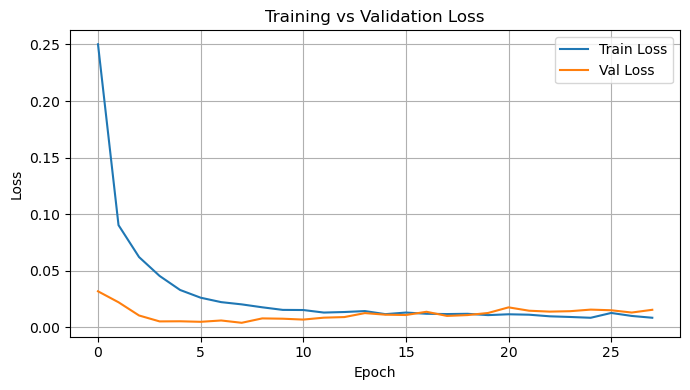

In [4]:
# Insert code to get train vs. validaton loss per epoch plot

After observing the plot above it is clear that our model is.....

**Model Metrics**

*The accuracy, f1-score, recall, precision, and confusion matrix for our baseline model can be seen below.*

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:  0.9169
Precision: 0.8943
Recall:    0.9993
F1-score:  0.9439
ROC AUC:   0.9916

Confusion Matrix:
 [[1367  518]
 [   3 4382]]


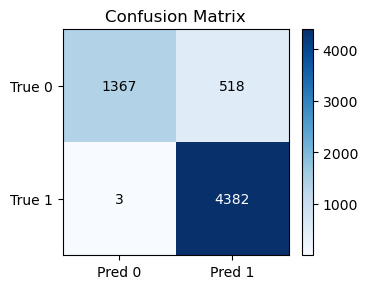

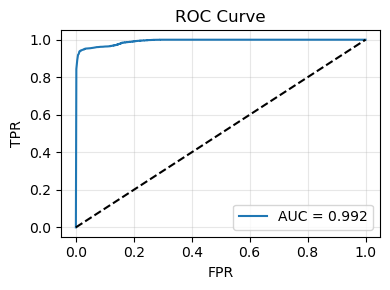

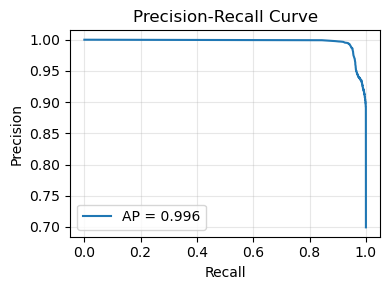

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)

# Computing the model's predictions on the test set.
y_prob = baseline_model.predict(X_test).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# Calculating the metrics for the model on the test set.
acc     = accuracy_score(y_test, y_pred)
prec    = precision_score(y_test, y_pred)
rec     = recall_score(y_test, y_pred)
f1      = f1_score(y_test, y_pred)
cm      = confusion_matrix(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Output metrics
print("Accuracy: ",  round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:   ", round(rec, 4))
print("F1-score: ", round(f1, 4))
print("ROC AUC:  ", round(roc_auc, 4))
print("\nConfusion Matrix:\n", cm)

# Confusion Matrix Plot
plt.figure(figsize=(4,3))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
thresh = cm.max() / 2
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha='center', va='center',
                 color="white" if cm[i,j] > thresh else "black")
plt.tight_layout()
plt.show()

# ROC Curve Plot
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Precision-Recall Curve Plot
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(4,3))
plt.plot(recall, precision, label=f"AP = {avg_precision:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Hyperparameter Optimization for the Transformer Model**

*The following parameters were tuned using hyperparameter optimization:*
- Learning Rate (0.0001, 0.002)
- etc.


In [6]:
# Insert call to get Hyperprameter Optimization results.

# Running the hyperparameter optimization from transformer.py
best_hp, tuner = tune_transformer(
    X_train, y_train,
    X_val, y_val,
    time_steps=time_steps,
    num_features=num_features,
    batch_size=64,
    epochs_tune=10,
    max_trials=50,
)

# Convert best_hp → simple Python dict using hp_to_params in transformer.py
tuned_params = hp_to_params(best_hp)

# Output best values found during tuning.
print("\nBest Hyperparameters Found:")
for k, v in tuned_params.items():
    print(f"  {k}: {v}")


Trial 50 Complete [00h 00m 34s]
val_accuracy: 0.997809648513794

Best val_accuracy So Far: 0.9996017813682556
Total elapsed time: 00h 34m 24s

Best hyperparameters:
  num_heads: 2
  ff_dim: 48
  num_blocks: 1
  dense_units: 64
  dropout_rate: 0.3
  lr: 0.0005

Best Hyperparameters Found:
  num_heads: 2
  ff_dim: 48
  num_blocks: 1
  dense_units: 64
  dropout_rate: 0.3
  lr: 0.0005


**Retraining Transformer  Model Using Optimized Hyperparameters**

*The model is now retrained using the optimal values found during HPO*

In [8]:
from scripts.transformer import train_transformer

# Function call to transformer.py to train the transformer using optimized hyperparameters.
opt_model, opt_history, opt_time = train_transformer(
    X_train, y_train,
    X_val, y_val,
    time_steps=time_steps,
    num_features=num_features,
    params=tuned_params,   # best parameters from HPO
    epochs=60,
)

print(f"Training time: {opt_time:.2f} seconds")

Epoch 1/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8179 - loss: 0.4004 - val_accuracy: 0.9898 - val_loss: 0.0430
Epoch 2/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9679 - loss: 0.0897 - val_accuracy: 0.9972 - val_loss: 0.0184
Epoch 3/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9794 - loss: 0.0574 - val_accuracy: 0.9938 - val_loss: 0.0188
Epoch 4/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9803 - loss: 0.0465 - val_accuracy: 0.9950 - val_loss: 0.0141
Epoch 5/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9884 - loss: 0.0307 - val_accuracy: 0.9970 - val_loss: 0.0105
Epoch 6/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9902 - loss: 0.0253 - val_accuracy: 0.9942 - val_loss: 0.0141
Epoch 7/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9919 - loss: 0.0202 - val_accuracy: 0.9968 - val_loss: 0.0077
Epoch 8/60
217/217 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0183 - val_accur

**Comparison of Training Time between Baseline and Optimized Models**

*After HPO we can see the training time of models was changed accordingly*

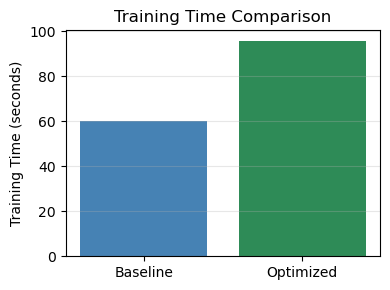

In [9]:
# Insert code to compare both training times with a bar plot.

**Comparison of Training and Validation Loss for the Optimzied Model**

*The below plot shows the comparison between Training and Validation Loss during training*

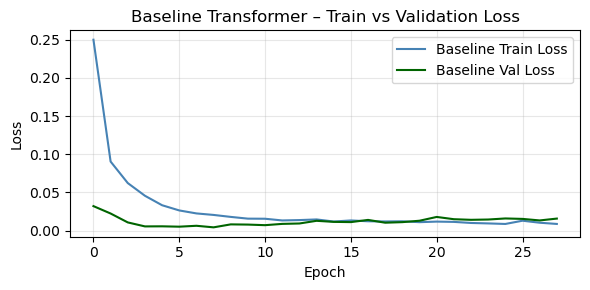

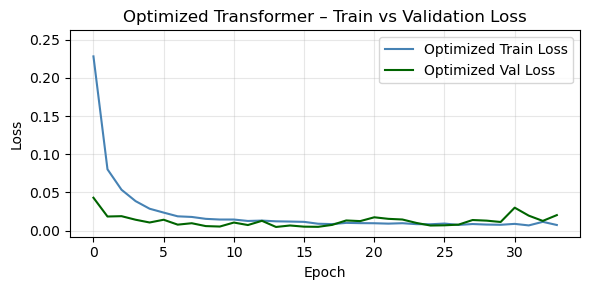

In [10]:
# Insert call to get the plot of Training vs, Validation Loss for the final model during training.

# --- Compute shared y-axis limits ---
all_losses = (
    list(baseline_history.history["loss"]) +
    list(baseline_history.history["val_loss"]) +
    list(opt_history.history["loss"]) +
    list(opt_history.history["val_loss"])
)

y_min = min(all_losses)
y_max = max(all_losses)

padding = (y_max - y_min) * 0.05
y_min -= padding
y_max += padding

# Baseline Plot
plt.figure(figsize=(6,3))
plt.plot(baseline_history.history["loss"],     label="Baseline Train Loss", color="steelblue")
plt.plot(baseline_history.history["val_loss"], label="Baseline Val Loss",   color="darkgreen")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Baseline Transformer – Train vs Validation Loss")
plt.ylim(y_min, y_max)       
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Optimized Plot
plt.figure(figsize=(6,3))
plt.plot(opt_history.history["loss"],     label="Optimized Train Loss", color="steelblue")
plt.plot(opt_history.history["val_loss"], label="Optimized Val Loss",   color="darkgreen")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Optimized Transformer – Train vs Validation Loss")
plt.ylim(y_min, y_max)       
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




**Optimized Model Metrics**

*After completing HPO, the accuracy, precison, f1-score, recall, and confusion matrix of the optimized model can be seen below.*

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy:  0.925
Precision: 0.9035
Recall:    0.9995
F1-score:  0.9491
ROC AUC:   0.9963

Confusion Matrix:
 [[1417  468]
 [   2 4383]]


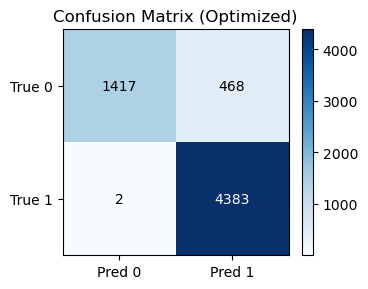

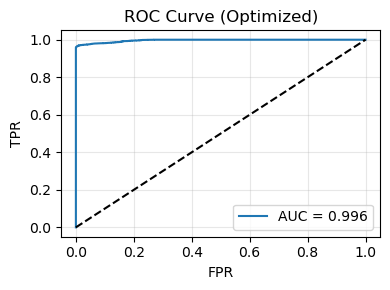

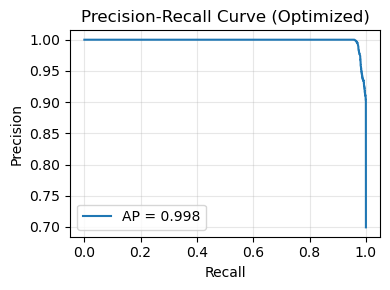

In [14]:
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)
import matplotlib.pyplot as plt

# Computing the optimized model's predictions on the test set.
y_prob_opt = opt_model.predict(X_test).ravel()
y_pred_opt = (y_prob_opt >= 0.5).astype(int)

# Calculating the metrics for the optimized model on the test set.
acc_opt     = accuracy_score(y_test, y_pred_opt)
prec_opt    = precision_score(y_test, y_pred_opt)
rec_opt     = recall_score(y_test, y_pred_opt)
f1_opt      = f1_score(y_test, y_pred_opt)
cm_opt      = confusion_matrix(y_test, y_pred_opt)

fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)
roc_auc_opt = auc(fpr_opt, tpr_opt)

print("Accuracy: ",  round(acc_opt, 4))
print("Precision:", round(prec_opt, 4))
print("Recall:   ", round(rec_opt, 4))
print("F1-score: ", round(f1_opt, 4))
print("ROC AUC:  ", round(roc_auc_opt, 4))
print("\nConfusion Matrix:\n", cm_opt)

# Comfusion Matrix Plot
plt.figure(figsize=(4,3))
plt.imshow(cm_opt, cmap="Blues")
plt.title("Confusion Matrix (Optimized)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["True 0", "True 1"])
thresh = cm_opt.max() / 2
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_opt[i,j], ha='center', va='center',
                 color="white" if cm_opt[i,j] > thresh else "black")
plt.tight_layout()
plt.show()

# ROC Curve Plot
plt.figure(figsize=(4,3))
plt.plot(fpr_opt, tpr_opt, label=f"AUC = {roc_auc_opt:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve (Optimized)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Precision-Recall Curve Plot
precision_opt, recall_opt, _ = precision_recall_curve(y_test, y_prob_opt)
avg_precision_opt = average_precision_score(y_test, y_prob_opt)

plt.figure(figsize=(4,3))
plt.plot(recall_opt, precision_opt, label=f"AP = {avg_precision_opt:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Optimized)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
    

**Final Comparison of Baseline vs. Optimized Transformer Models**

*The below plots show the effectiveness of our HPO performed on the Transformer Model for the CNC Toolwear Dataset.*

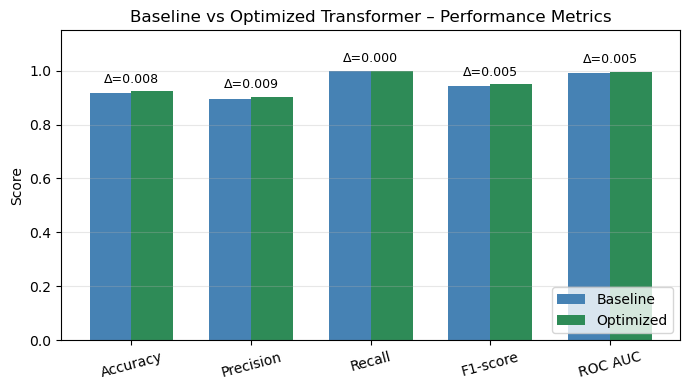

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Collect metrics into arrays
baseline_metrics  = [acc,      prec,      rec,      f1,      roc_auc]
optimized_metrics = [acc_opt,  prec_opt,  rec_opt,  f1_opt,  roc_auc_opt]
metric_names      = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]

x = np.arange(len(metric_names))
width = 0.35  # bar width

plt.figure(figsize=(7,4))
plt.bar(x - width/2, baseline_metrics,  width, label="Baseline",  color="steelblue")
plt.bar(x + width/2, optimized_metrics, width, label="Optimized", color="seagreen")

# --- Add delta annotations ---
for i in range(len(metric_names)):
    base = baseline_metrics[i]
    opt  = optimized_metrics[i]
    delta = opt - base

    plt.text(
        x[i],                      # x position (midpoint of the pair)
        max(base, opt) + 0.02,     # slightly above taller bar
        f"Δ={delta:.3f}",           # delta label
        ha="center",
        va="bottom",
        fontsize=9,
        color="black"
    )

plt.xticks(x, metric_names, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1.15)
plt.title("Baseline vs Optimized Transformer – Performance Metrics")
plt.legend(loc="lower right")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


**Overall Summary of Transformer Model Training**

After completing the training of our  Transformer Model.....

# Current ROUGHWORK

In [ ]:

import sys, os, importlib

# Get project root no matter where notebook is run from
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd()))
sys.path.append(os.path.join(PROJECT_ROOT, "scripts"))

import lstm_run
importlib.reload(lstm_run)


X_train, y_train, window_len, num_features = lstm_run.load_window_csv(
    "data/data_windowed_csv/train_windows_w10.csv"
)

X_val, y_val, _, _ = lstm_run.load_window_csv(
    "data/data_windowed_csv/val_windows_w10.csv"
)

X_test, y_test, _, _ = lstm_run.load_window_csv(
    "data/data_windowed_csv/test_windows_w10.csv"
)


print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


model = lstm_run.build_lstm_model(window_len, num_features)
model.summary()

history = lstm_run.train_lstm(
    model,
    X_train, y_train,
    X_val, y_val,
    epochs=40,
    batch_size=32
)

preds, probs = lstm_run.predict_wear(model, X_test, threshold=0.3)

print("Shapes →", preds.shape, y_test.shape)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))



AttributeError: module 'lstm_run' has no attribute 'load_window_csv'

## GRU Model

In [ ]:
import sys, os, importlib

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd()))
sys.path.append(os.path.join(PROJECT_ROOT, "scripts"))

import gru_run
importlib.reload(gru_run)

# Load data
X_train, y_train, window_len, num_features = gru_run.load_window_csv(
    "data/data_windowed_csv/train_windows_w10.csv"
)
X_val, y_val, _, _ = gru_run.load_window_csv(
    "data/data_windowed_csv/val_windows_w10.csv"
)
X_test, y_test, _, _ = gru_run.load_window_csv(
    "data/data_windowed_csv/test_windows_w10.csv"
)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

# Build model
model = gru_run.build_gru_model(window_len, num_features)
model.summary()

# Train
history = gru_run.train_gru(
    model,
    X_train, y_train,
    X_val, y_val,
    epochs=40,
    batch_size=32
)

# Predict
preds, probs = gru_run.predict_success(model, X_test, threshold=0.3)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Shapes →", preds.shape, y_test.shape)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))






Train: (13271, 10, 25) (13271,)
Val: (4529, 10, 25) (4529,)
Test: (7324, 10, 25) (7324,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 64)         │        17,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

Class weights: {0: 1.2202096358955499, 1: 0.8471211540916634}
Epoch 1/40
415/415 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9612 - loss: 0.0263 - val_accuracy: 0.9991 - val_loss: 0.0016
Epoch 2/40
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9836 - loss: 0.0108 - val_accuracy: 0.9956 - val_loss: 0.0040
Epoch 3/40
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0068 - val_accuracy: 0.9837 - val_loss: 0.0217
Epoch 4/40
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9924 - loss: 0.0053 - val_accuracy: 0.9810 - val_loss: 0.0214
Epoch 5/40
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9916 - loss: 0.0048 - val_accuracy: 0.9914 - val_loss: 0.0103
Epoch 6/40
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9934 - loss: 0.0045 - val_accuracy: 0.9823 - val_loss: 0.0341
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shapes → (7324, 1) (7324,)
              precision    recall  f1-score   support

         0.0       1.00      0.09      0.17    